# Credit EDA Case Study

## Importing Required Libraries

In [172]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## CURRENT APPLICATION DATASET

## Reading The Dataset

In [173]:
application_data = pd.read_csv("application_data.csv")

In [174]:
application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Inspecting The Dataset

In [175]:
print("Application Data Dataset")
print("Number of rows: {}".format(application_data.shape[0]))
print("Number of columns: {}".format(application_data.shape[1]))

Application Data Dataset
Number of rows: 307511
Number of columns: 122


In [176]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Data Types

In [177]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


### Missing Values

In [178]:
# Sum of missing values in each column
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [179]:
# Percentage of missing values in each column
application_data.isnull().sum()/application_data.shape[0]*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### Dropping Columns With More Than 40 % Missing Values

In [180]:
application_data.dropna(axis=1, thresh=0.6*application_data.shape[0], inplace=True)

In [181]:
application_data.shape

(307511, 73)

### Missing Value Treatment

1. For continous columns we will use the median of that column to impute the missing values in that column.
2. For categorical columns we will use the mode of that column to impute the missing values in that column.

In [182]:
num_cols = ["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_FAM_MEMBERS", "EXT_SOURCE_2", "EXT_SOURCE_3", 
                "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", 
                "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE", "AMT_REQ_CREDIT_BUREAU_HOUR", 
                "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", 
                "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

for col in num_cols:
    application_data[col].fillna(application_data[col].median(),inplace=True)

In [183]:
cat_cols = ["NAME_TYPE_SUITE", "OCCUPATION_TYPE"]

for col in cat_cols:
    application_data[col].fillna(application_data[col].mode()[0],inplace=True)

#### Let us check again for missing value

In [184]:
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

Now we do not have any null values

### Checking The Numerical Columns For Outlier Values And Making Changes If Necessary

First we store all the continous variables in a list

In [185]:
con_cols = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
            "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH",    
            "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", 
            "HOUR_APPR_PROCESS_START", "EXT_SOURCE_2", "EXT_SOURCE_3", "OBS_30_CNT_SOCIAL_CIRCLE", 
            "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", 
            "DAYS_LAST_PHONE_CHANGE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", 
            "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", 
            "AMT_REQ_CREDIT_BUREAU_YEAR"]

application_data[con_cols].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152664,2.052463,2.031521,12.063419,5.145034e-01,0.515695,1.417523,0.142944,1.400626,0.099717,-962.858119,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910679,0.509034,0.502737,3.265832,1.908699e-01,0.174736,2.398395,0.446033,2.377224,0.361735,826.807226,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,6.634218e-01,0.636376,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


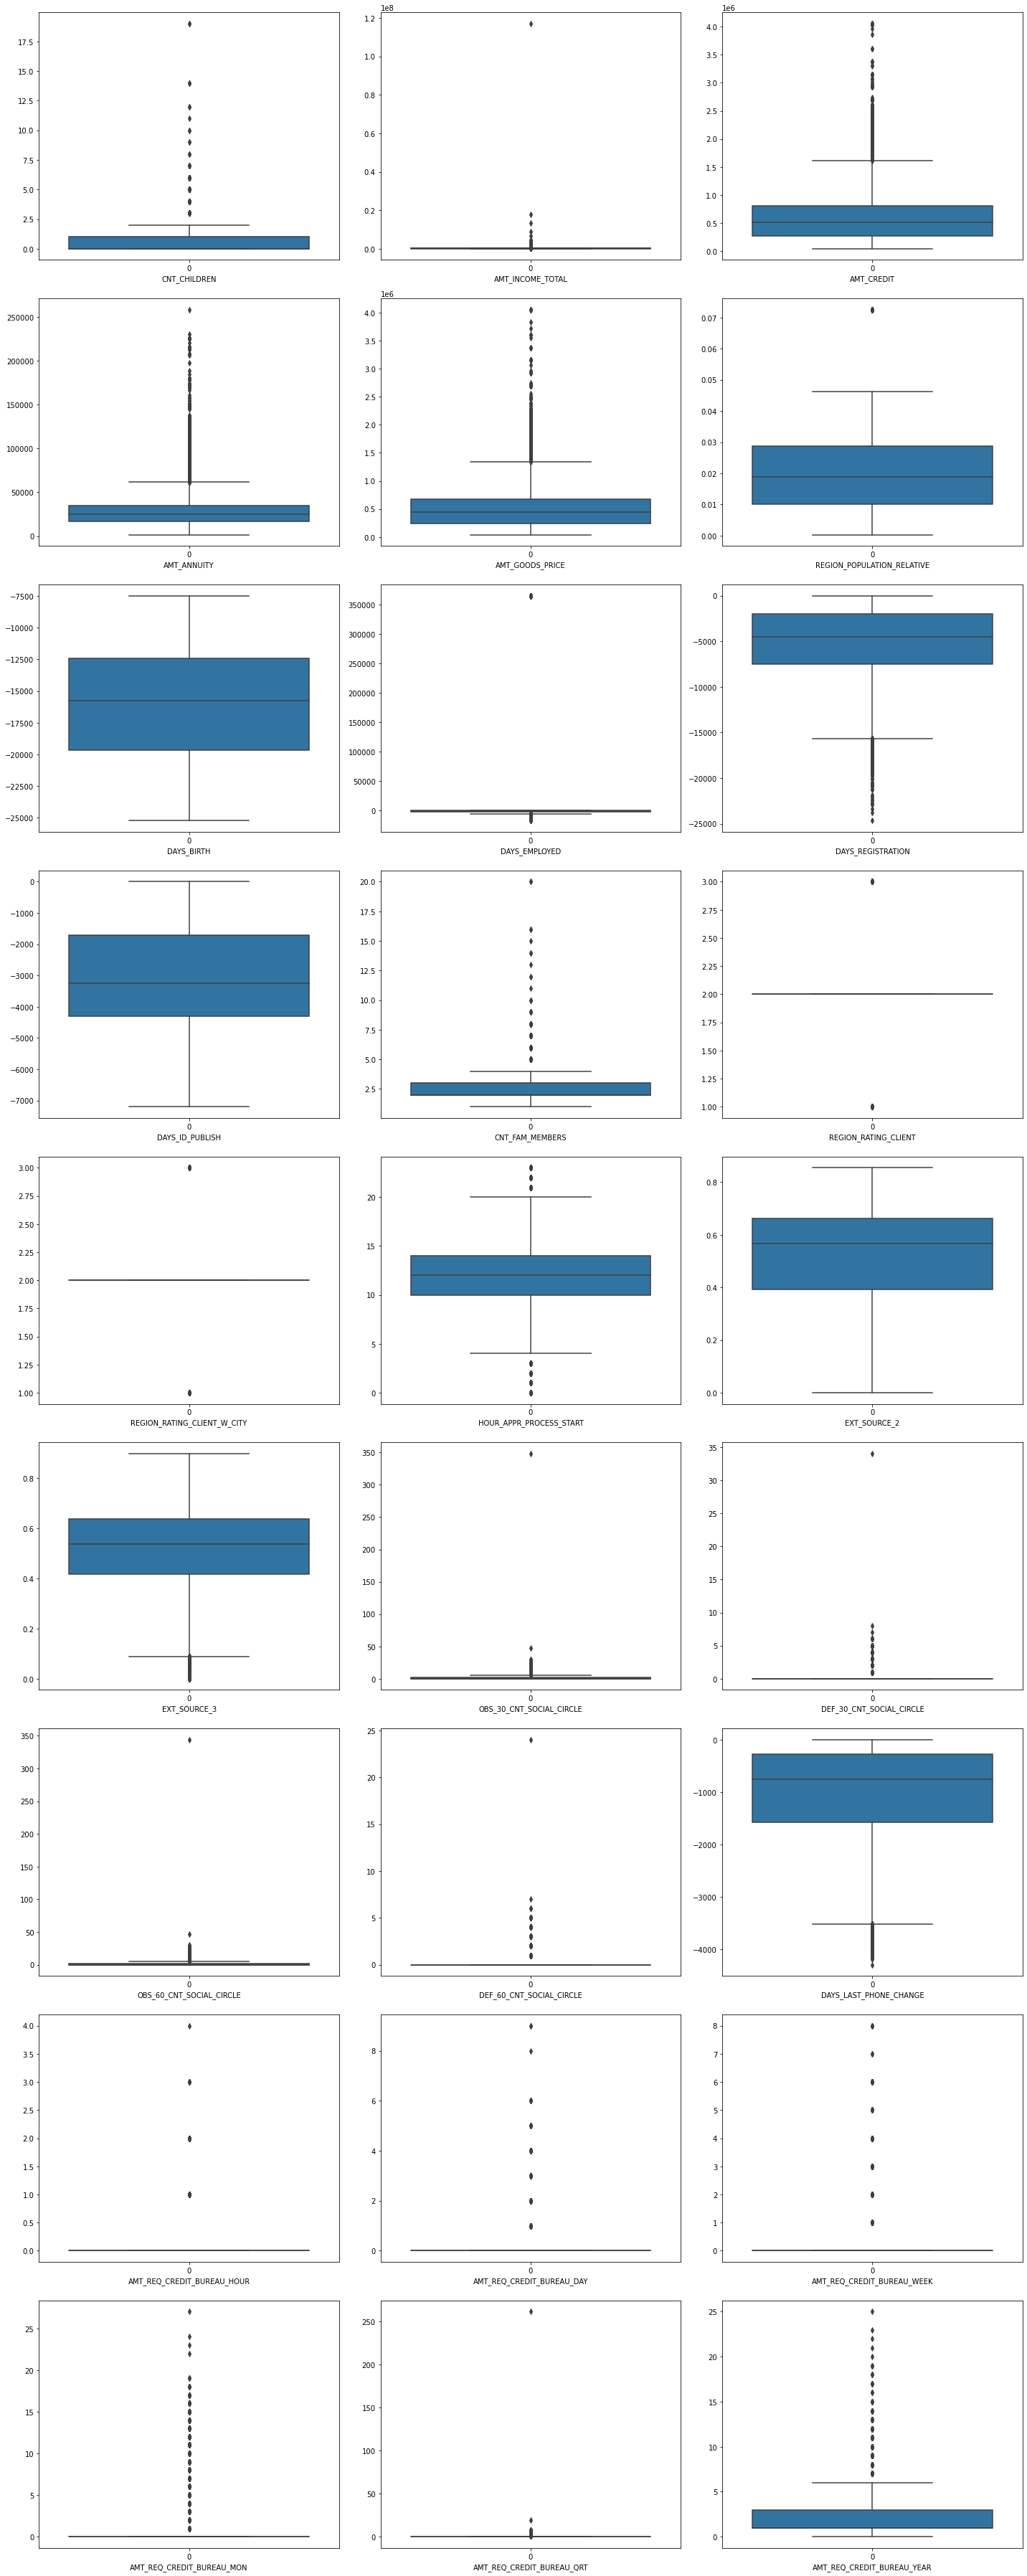

In [186]:
fig, ax = plt.subplots(9, 3, figsize=(20,50))
for i, col in enumerate(con_cols):
    x,y = divmod(i,3)
    sns.boxplot(data=application_data[col], ax=ax[x,y])
    ax[x,y].set_xlabel(col)
plt.tight_layout()
plt.show()

We can observe that there are huge outliers in almost all the columns except `DAYS_BIRTH`, `DAYS_ID_PUBLISH`, `EXT_SOURCE_2` and `EXT_SOURCE_3`. There are many points outside the Minimum and Maximum lines of the box plots.

For this analysis we are not removing the outliers.

#### DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH column.

In [187]:
#These five columns have negative values so we will make them positive.
cols = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
for col in cols:
    application_data.loc[:,col] = application_data[col].apply(lambda x: x*-1)

### Checking The Categorical Columns And Making Changes If Necessary

In [188]:
#Checking the NAME_CONTRACT_TYPE column.
application_data["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [189]:
#Checking the CODE_GENDER column.
application_data["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [190]:
#Changing from XNA to F in the CODE_GENDER column
application_data["CODE_GENDER"].replace(to_replace="XNA", value="F", inplace=True)

In [191]:
#Checking the CODE_GENDER column again
application_data["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [192]:
#Checking the NAME_TYPE_SUITE column.
application_data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [193]:
#Checking the NAME_INCOME_TYPE column.
application_data["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [194]:
#Checking the NAME_EDUCATION_TYPE column.
application_data["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [195]:
#Checking the NAME_FAMILY_STATUS column.
application_data["NAME_FAMILY_STATUS"].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [196]:
#Combining Civil marriage into Married, renaming Single / not married and removing Unknown in NAME_FAMILY_STATUS column
application_data["NAME_FAMILY_STATUS"].replace(to_replace="Civil marriage", value="Married",inplace=True)
application_data["NAME_FAMILY_STATUS"].replace(to_replace="Single / not married", value="Single",inplace=True)
application_data= application_data.loc[~(application_data["NAME_FAMILY_STATUS"]=="Unknown")]

In [197]:
#Checking the NAME_FAMILY_STATUS column again.
application_data["NAME_FAMILY_STATUS"].value_counts()

Married      226207
Single        45444
Separated     19770
Widow         16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [198]:
#Checking the NAME_HOUSING_TYPE column.
application_data["NAME_HOUSING_TYPE"].value_counts()

House / apartment      272867
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [199]:
#Checking the OCCUPATION_TYPE column
application_data["OCCUPATION_TYPE"].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21370
Drivers                   18603
High skill tech staff     11380
Accountants                9812
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [200]:
#Checking the WEEKDAY_APPR_PROCESS_START column
application_data["WEEKDAY_APPR_PROCESS_START"].value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50590
FRIDAY       50337
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [201]:
#Checking the HOUR_APPR_PROCESS_START column
application_data["HOUR_APPR_PROCESS_START"].value_counts()

10    37722
11    37229
12    34233
13    30959
14    27681
9     27384
15    24838
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [202]:
#Checking the ORGANIZATION_TYPE column
application_data["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [203]:
#We can see that there are 55374 rows having Occupation Type as XNA. Let's check the percentage
round(application_data[application_data["ORGANIZATION_TYPE"]=="XNA"].shape[0]/application_data.shape[0]*100,2)

18.01

In [204]:
#Since 18% is quite a significant portion we will let the XNA rows remain.

### Creating New Columns And Dropping Columns Which Are Not Required

#### 1. Creating a new column EXT_SOURCE which will be the mean of EXT_SOURCE_2 & EXT_SOURCE_3
        

In [205]:
application_data["EXT_SOURCE"] = (application_data["EXT_SOURCE_2"] + application_data["EXT_SOURCE_3"])/2

In [206]:
application_data["EXT_SOURCE"].head(10)

0    0.201162
1    0.578761
2    0.642739
3    0.592859
4    0.429007
5    0.487726
6    0.608030
7    0.627467
8    0.478736
9    0.640960
Name: EXT_SOURCE, dtype: float64

#### 2. Creating a new column AMT_REQ_CREDIT_BUREAU which will be the sum of AMT_REQ_CREDIT_BUREAU_HOUR,  AMT_REQ_CREDIT_BUREAU_DAY,  AMT_REQ_CREDIT_BUREAU_WEEK,  AMT_REQ_CREDIT_BUREAU_MON,  AMT_REQ_CREDIT_BUREAU_QRT,  AMT_REQ_CREDIT_BUREAU_YEAR

In [207]:
application_data["AMT_REQ_CREDIT_BUREAU"] = application_data["AMT_REQ_CREDIT_BUREAU_HOUR"] + application_data["AMT_REQ_CREDIT_BUREAU_DAY"] +application_data["AMT_REQ_CREDIT_BUREAU_WEEK"] + application_data["AMT_REQ_CREDIT_BUREAU_MON"]+application_data["AMT_REQ_CREDIT_BUREAU_QRT"] + application_data["AMT_REQ_CREDIT_BUREAU_YEAR"]

In [208]:
application_data["AMT_REQ_CREDIT_BUREAU"].head(10)

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
5    2.0
6    4.0
7    0.0
8    1.0
9    1.0
Name: AMT_REQ_CREDIT_BUREAU, dtype: float64

#### 3. Converting DAYS_BIRTH and DAYS_EMPLOYED into AGE and EXPERIENCE respectively.

In [209]:
application_data["AGE"] = application_data["DAYS_BIRTH"].apply(lambda x: round(x/365,2))
application_data["EXPERIENCE"] = application_data["DAYS_EMPLOYED"].apply(lambda x: round(x/365,2))

In [210]:
application_data["AGE"].head(10)

0    25.92
1    45.93
2    52.18
3    52.07
4    54.61
5    46.41
6    37.75
7    51.64
8    55.07
9    39.64
Name: AGE, dtype: float64

In [211]:
application_data["EXPERIENCE"].head(10)

0       1.75
1       3.25
2       0.62
3       8.33
4       8.32
5       4.35
6       8.58
7       1.23
8   -1000.67
9       5.53
Name: EXPERIENCE, dtype: float64

We can see that there are negative values in EXPERIENCE column which is meaningless. We will assume that negative values correspond to no experience. So we will convert all negative values to zero.

In [212]:
application_data.loc[application_data["EXPERIENCE"]<0,"EXPERIENCE"] = 0

#### 4. Binning AMT_INCOME_TOTAL

In [213]:
application_data["AMT_INCOME_TOTAL"].quantile([0,0.25,0.5,0.75,1])

0.00        25650.0
0.25       112500.0
0.50       147150.0
0.75       202500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [214]:
application_data["INCOME_GROUP"] = pd.cut(application_data["AMT_INCOME_TOTAL"],
    bins=[0,100000,150000,250000,350000,150000000], labels=["0-1000K","1000K-1500K","1500K-2500K","2500K-3500K","3500K+"])

In [215]:
application_data["INCOME_GROUP"].value_counts()

1500K-2500K    112443
1000K-1500K     91591
0-1000K         63698
2500K-3500K     25913
3500K+          13864
Name: INCOME_GROUP, dtype: int64

#### 5. Binning AMT_CREDIT

In [216]:
application_data["AMT_CREDIT"].quantile([0,0.25,0.5,0.75,1])

0.00      45000.0
0.25     270000.0
0.50     513531.0
0.75     808650.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [217]:
application_data["CREDIT_GROUP"] = pd.cut(application_data["AMT_CREDIT"],
    bins=[0,250000,500000,1000000,2000000,4000000], labels=["0-2500K","2500-5000K","5000K-10000K","10000K-20000K","20000K+"])

In [218]:
application_data["CREDIT_GROUP"].value_counts()

5000K-10000K     108191
2500-5000K        90135
0-2500K           59198
10000K-20000K     47956
20000K+            2019
Name: CREDIT_GROUP, dtype: int64

#### 6. Binning AMT_ANNUITY

In [219]:
application_data["AMT_ANNUITY"].quantile([0,0.25,0.5,0.75,1])

0.00      1615.5
0.25     16524.0
0.50     24903.0
0.75     34596.0
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [220]:
application_data["ANNUITY_GROUP"] = pd.cut(application_data["AMT_ANNUITY"],
    bins=[0,10000,20000,35000,50000,300000], labels=["0-100K","100K-200K","200-350K","350K-500K","500K+"])

In [221]:
application_data["ANNUITY_GROUP"].value_counts()

200-350K     126144
100K-200K     83222
350K-500K     53563
0-100K        23283
500K+         21297
Name: ANNUITY_GROUP, dtype: int64

#### 7. Binning HOUR_APPR_PROCESS_START

In [222]:
application_data["TIME"] = pd.cut(application_data["HOUR_APPR_PROCESS_START"],
    bins=[0,6,12,18,24], labels=["0-6","6-12","12-18","18-24"], include_lowest=True)

In [223]:
application_data["TIME"].value_counts()

6-12     160826
12-18    127812
0-6       13231
18-24      5640
Name: TIME, dtype: int64

#### 8. Binning AGE

In [224]:
application_data["AGE"].quantile([0,0.25,0.5,0.75,1])

0.00    20.52
0.25    34.01
0.50    43.15
0.75    53.92
1.00    69.12
Name: AGE, dtype: float64

In [225]:
application_data["AGE_GROUP"] = pd.cut(application_data["AGE"],
    bins=[20,30,40,50,70], labels=["20-30","30-40","40-50","50-70"])

In [226]:
application_data["AGE_GROUP"].value_counts()

50-70    103628
30-40     82314
40-50     76526
20-30     45041
Name: AGE_GROUP, dtype: int64

#### 9. Binning EXPERIENCE

In [227]:
application_data["EXPERIENCE"].quantile([0,0.25,0.5,0.75,1])

0.00     0.00
0.25     0.79
0.50     3.33
0.75     7.56
1.00    49.07
Name: EXPERIENCE, dtype: float64

In [228]:
application_data["EXPERIENCE_GROUP"] = pd.cut(application_data["EXPERIENCE"],
    bins=[0,1,3,10,20,50], labels=["0-1","1-3","3-10","10-20","20+"], include_lowest=True)

In [229]:
application_data["EXPERIENCE_GROUP"].value_counts()

3-10     111672
0-1       83435
1-3       61469
10-20     38384
20+       12549
Name: EXPERIENCE_GROUP, dtype: int64

#### Binning REGION_POPULATION_RELATIVE

In [230]:
application_data["REGION_POPULATION_RELATIVE"].quantile([0,0.25,0.5,0.75,1])

0.00    0.000290
0.25    0.010006
0.50    0.018850
0.75    0.028663
1.00    0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [231]:
application_data["REGION_POPULATION_RELATIVE"] = pd.cut(application_data["REGION_POPULATION_RELATIVE"],
    bins=[0,0.015,0.05,0.1], labels=["0-0.15","0.015-0.05","0.05-0.1"], include_lowest=True)

In [232]:
application_data["REGION_POPULATION_RELATIVE"].value_counts()

0.015-0.05    186205
0-0.15        112892
0.05-0.1        8412
Name: REGION_POPULATION_RELATIVE, dtype: int64

#### Binning DAYS_LAST_PHONE_CHANGE

In [233]:
application_data["DAYS_LAST_PHONE_CHANGE"].quantile([0,0.25,0.5,0.75,1])

0.00      -0.0
0.25     274.0
0.50     757.0
0.75    1570.0
1.00    4292.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [234]:
application_data["LAST_PHONE_CHANGE"] = pd.cut(application_data["DAYS_LAST_PHONE_CHANGE"],
    bins=[0,7,30,180,365,4500], labels=["Last Week","Last Month","Last 6 Months","Last Year","1 Year+"], include_lowest=True)

In [235]:
application_data["LAST_PHONE_CHANGE"].value_counts()

1 Year+          214889
Last Week         47653
Last Year         28710
Last 6 Months     12912
Last Month         3345
Name: LAST_PHONE_CHANGE, dtype: int64

#### Binning EXT_SOURCE

In [236]:
application_data["EXT_SOURCE"].quantile([0,0.25,0.5,0.75,1])

0.00    0.000269
0.25    0.425890
0.50    0.532120
0.75    0.615340
1.00    0.840552
Name: EXT_SOURCE, dtype: float64

In [237]:
application_data["EXT_SOURCE"] = pd.cut(application_data["EXT_SOURCE"],
    bins=[0,0.3,0.6,1], labels=["0-0.3","0.3-0.6","0.6-1"], include_lowest=True)

In [238]:
application_data["EXT_SOURCE"].value_counts()

0.3-0.6    194168
0.6-1       91330
0-0.3       22011
Name: EXT_SOURCE, dtype: int64

#### Binning AMT_REQ_CREDIT_BUREAU

In [239]:
application_data["AMT_REQ_CREDIT_BUREAU"].quantile([0,0.25,0.5,0.75,1])

0.00      0.0
0.25      1.0
0.50      2.0
0.75      3.0
1.00    262.0
Name: AMT_REQ_CREDIT_BUREAU, dtype: float64

In [240]:
application_data["AMT_REQ_CREDIT_BUREAU"] = pd.cut(application_data["AMT_REQ_CREDIT_BUREAU"],
    bins=[0,5,300], labels=["0-5","5+"], include_lowest=True)

In [241]:
application_data["AMT_REQ_CREDIT_BUREAU"].value_counts()

0-5    281770
5+      25739
Name: AMT_REQ_CREDIT_BUREAU, dtype: int64

#### Dropping The Redundant Columns

In [242]:
drop_cols = ["EXT_SOURCE_2","EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", 
            "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT",
            "AMT_REQ_CREDIT_BUREAU_YEAR", "DAYS_BIRTH", "DAYS_EMPLOYED", "AMT_INCOME_TOTAL", "AMT_CREDIT",
            "AMT_ANNUITY", "HOUR_APPR_PROCESS_START", "AGE", "EXPERIENCE", "DAYS_LAST_PHONE_CHANGE"]

application_data.drop(drop_cols, axis=1, inplace=True)

#### Dropping A Few More Columns Which We Dont Think Will Be Important For The Analysis

In [243]:
#After checking the statistical description of these columns we thought it would be best to leave them out of our analysis

drop_cols = ["AMT_GOODS_PRICE","NAME_TYPE_SUITE", "CNT_CHILDREN", "DAYS_ID_PUBLISH", "DAYS_REGISTRATION",
            "CNT_FAM_MEMBERS", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE",
            "DEF_60_CNT_SOCIAL_CIRCLE"]

application_data.drop(drop_cols, axis=1, inplace=True)

#### Checking the columns after all the operations

In [244]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307509 non-null  int64   
 1   TARGET                       307509 non-null  int64   
 2   NAME_CONTRACT_TYPE           307509 non-null  object  
 3   CODE_GENDER                  307509 non-null  object  
 4   FLAG_OWN_CAR                 307509 non-null  object  
 5   FLAG_OWN_REALTY              307509 non-null  object  
 6   NAME_INCOME_TYPE             307509 non-null  object  
 7   NAME_EDUCATION_TYPE          307509 non-null  object  
 8   NAME_FAMILY_STATUS           307509 non-null  object  
 9   NAME_HOUSING_TYPE            307509 non-null  object  
 10  REGION_POPULATION_RELATIVE   307509 non-null  category
 11  FLAG_MOBIL                   307509 non-null  int64   
 12  FLAG_EMP_PHONE               307509 non-null

Looks Good!

## Exploratory Data Analysis

In [245]:
def displayCountPlot(feature,df,figsize=(4,5),axes=None):
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=feature,data=df)
        
    ax.set_xlabel(feature)
    ax.set_ylabel("COUNT")
    plt.xticks(rotation=45, ha="center")

    for p in ax.patches:
        text = "{:.1f}%".format(p.get_height()/df.shape[0]*100)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(text,(x,y),ha="center",va="center")

### Checking For Data Imbalance

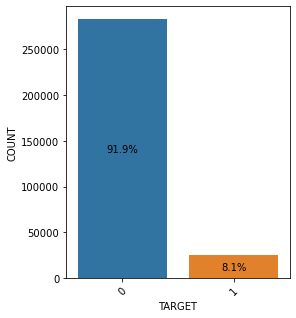

In [246]:
displayCountPlot("TARGET", application_data)

As we can see in the above plot there is a lot of data imbalance. There is 91.9% of non-defaulters and 8.1% of defaulters in the dataset

In [247]:
#Creating seperate dataframes for defaulters and non-defaulters

non_defaulters = application_data.loc[application_data["TARGET"]==0]
defaulters = application_data.loc[application_data["TARGET"]==1]

### Univariate Analysis

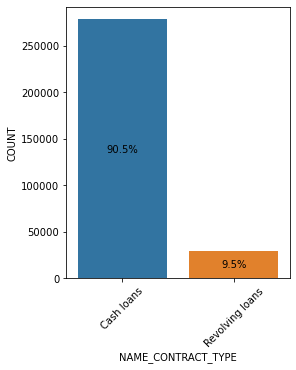

In [248]:
displayCountPlot("NAME_CONTRACT_TYPE", application_data)

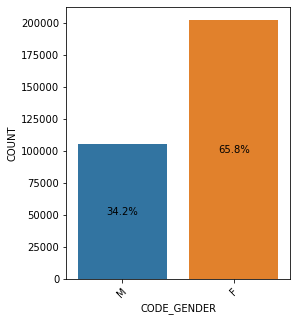

In [249]:
displayCountPlot("CODE_GENDER", application_data)

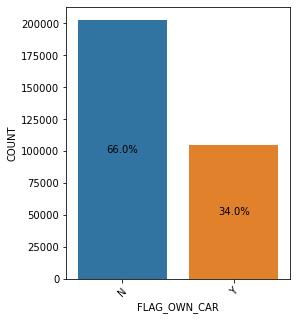

In [250]:
displayCountPlot("FLAG_OWN_CAR", application_data)

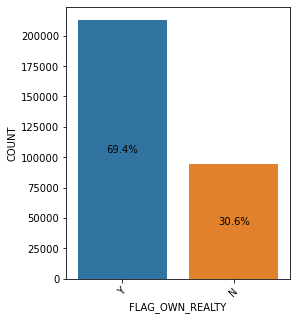

In [251]:
displayCountPlot("FLAG_OWN_REALTY", application_data)

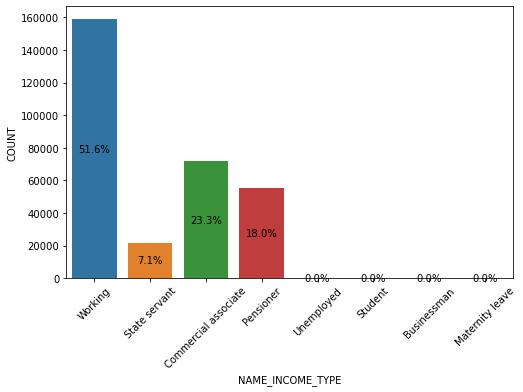

In [252]:
displayCountPlot("NAME_INCOME_TYPE", application_data, (8,5))

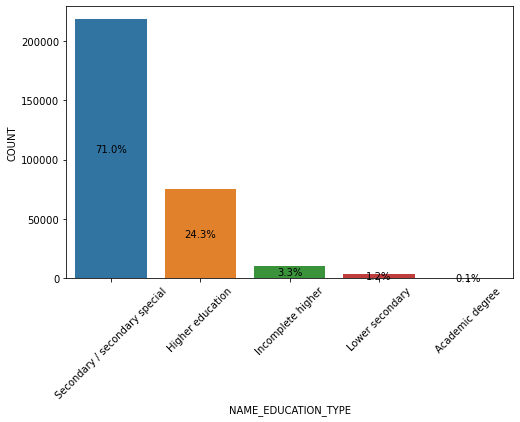

In [253]:
displayCountPlot("NAME_EDUCATION_TYPE", application_data, (8,5))

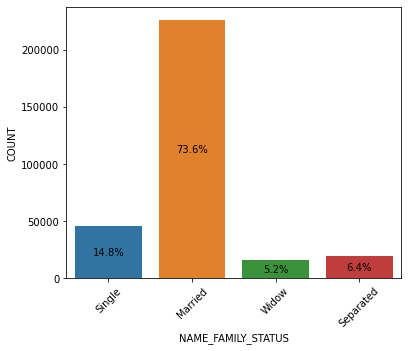

In [254]:
displayCountPlot("NAME_FAMILY_STATUS", application_data, (6,5))

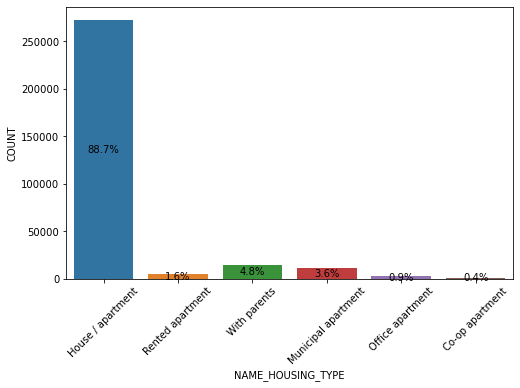

In [255]:
displayCountPlot("NAME_HOUSING_TYPE", application_data, (8,5))

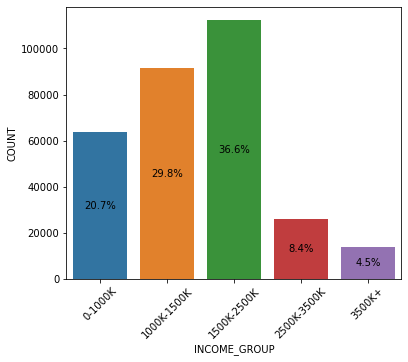

In [256]:
displayCountPlot("INCOME_GROUP", application_data, (6,5))

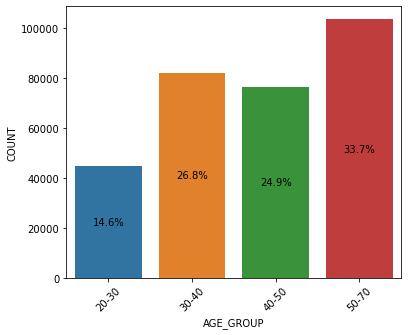

In [257]:
displayCountPlot("AGE_GROUP", application_data, (6,5))

### Bivariate Analysis

#### 1. Personal Attributes Vs Target

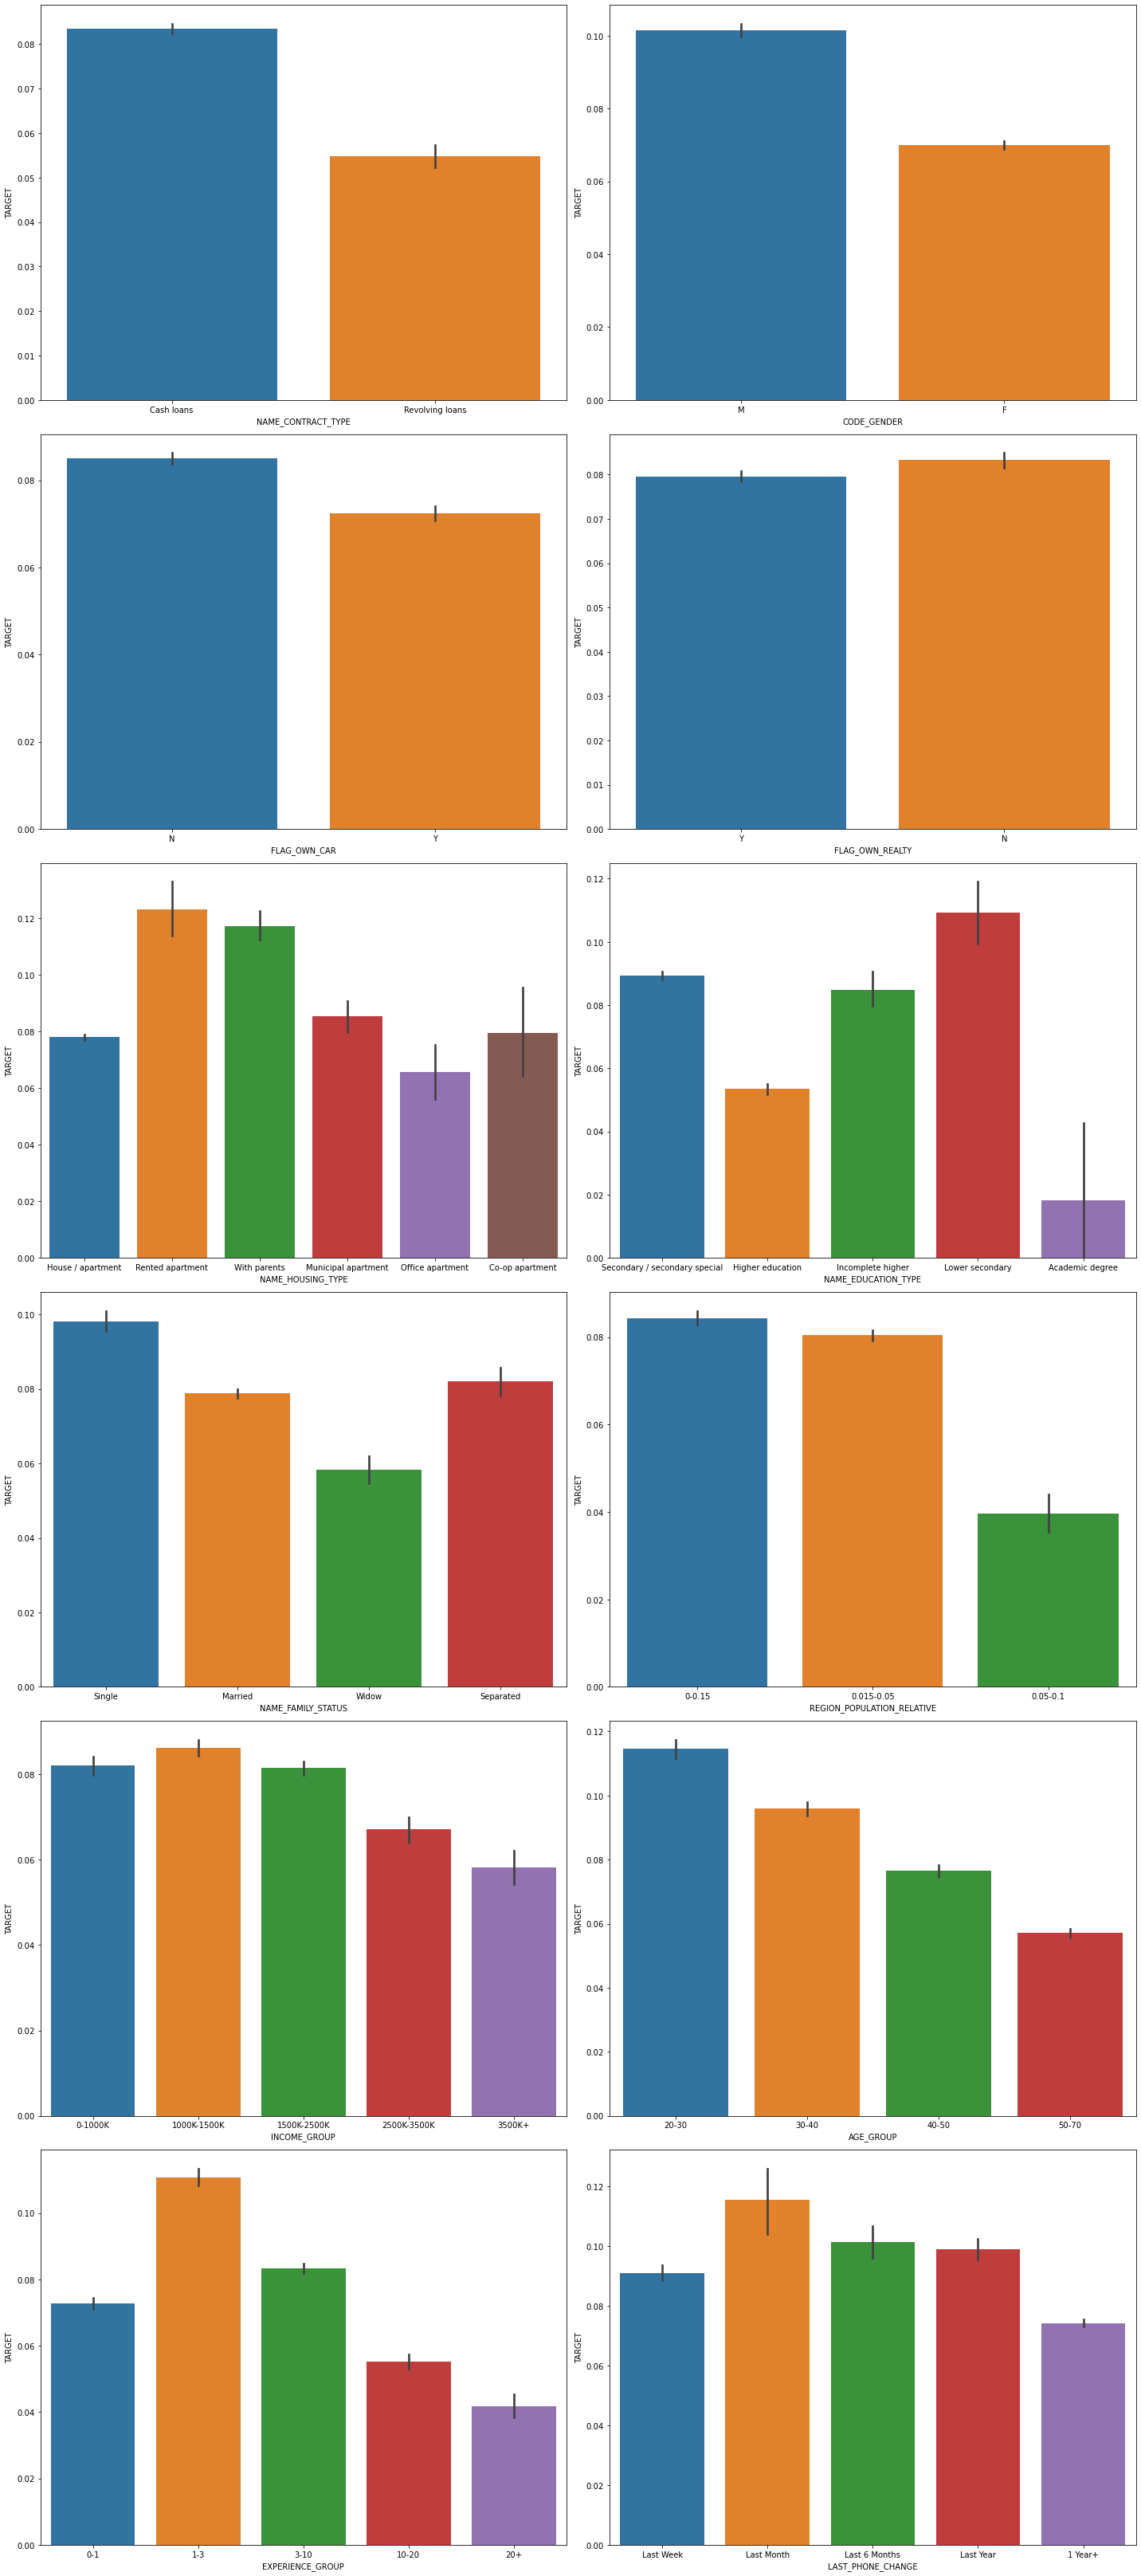

In [258]:
cols = ["NAME_CONTRACT_TYPE","CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_HOUSING_TYPE", "NAME_EDUCATION_TYPE",
        "NAME_FAMILY_STATUS", "REGION_POPULATION_RELATIVE","INCOME_GROUP", "AGE_GROUP", "EXPERIENCE_GROUP", 
        "LAST_PHONE_CHANGE"]  

fig,ax = plt.subplots(6,2, figsize=(20,45))
for i,col in enumerate(cols):
    x,y = divmod(i,2)
    sns.barplot(x=col, y="TARGET", data=application_data, ax=ax[x,y])
    
plt.tight_layout()
plt.show()

Insights-
1. Those who get Cash Loans are more likely to default than those who get Revolving Loans.
2. Males are more likely to default than Females
3. Those who do not own a car are more likely to default than those who own a car.
4. Owning a realty does not seem to have a difference on default rate.
5. Those who live in a Rented Appartment or with their Parents are most likely to deafult.
6. The rate of default decreases with increase in Relative Population Of The Region.
7. The rate of default decreases with increase in Income.
8. The rate of default decreases with increase in Age.
9. People in the 1-3 EXPERIENCE_GROUP are most likely to default.
10. People who changed their phone in the last month are the most likely to default.

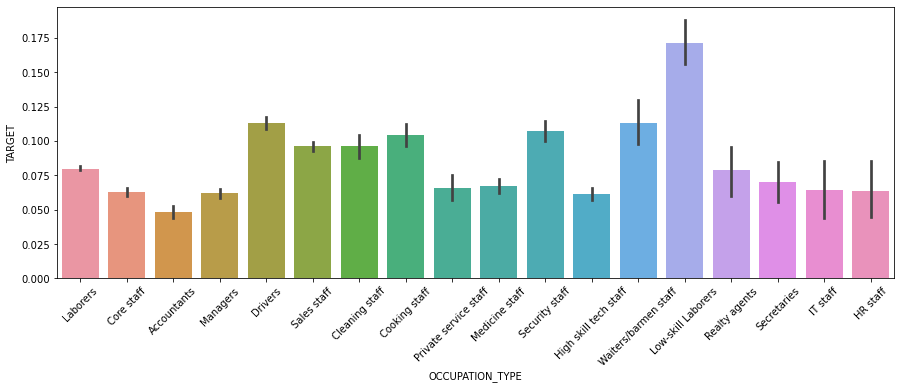

In [259]:
plt.figure(figsize=(15,5))
sns.barplot(x="OCCUPATION_TYPE", y="TARGET", data=application_data)
plt.xticks(rotation=45, ha="center")
plt.show()

Insight - Low-skill Laborers are most likely to default.

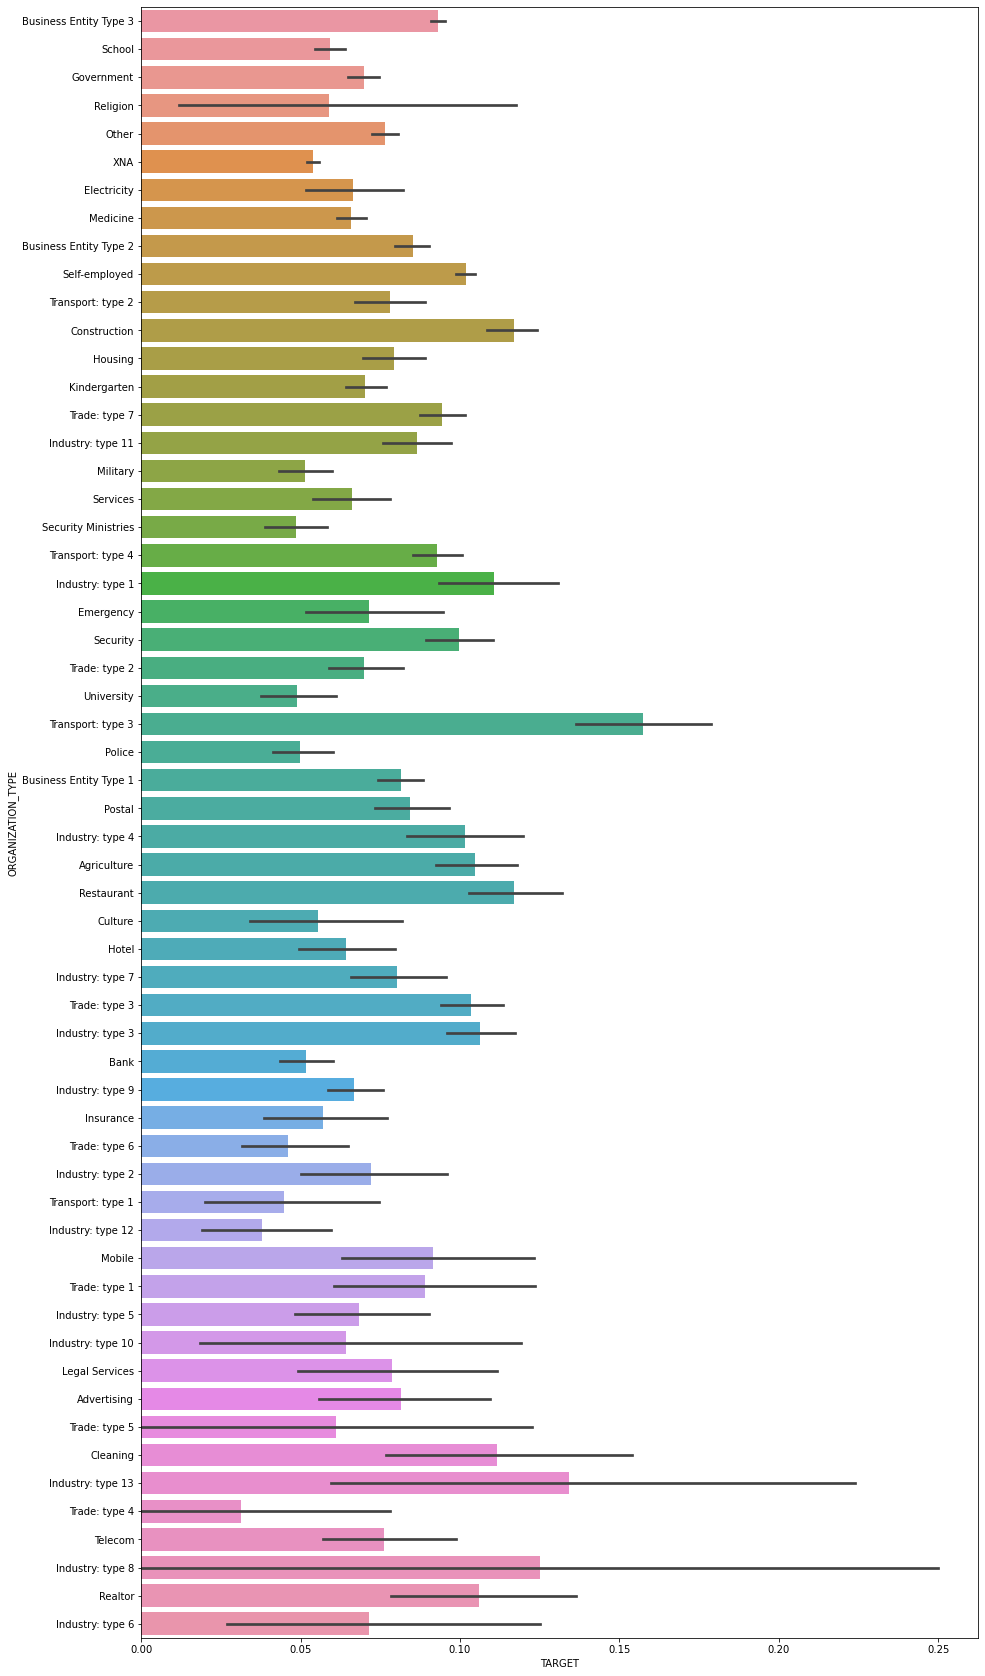

In [260]:
plt.figure(figsize=(15,30))
sns.barplot(y="ORGANIZATION_TYPE", x="TARGET", data=application_data, orient="h")
plt.show()

Insight - Those working in the Industry type 8, Industry type 13 and Transport type 3 are most likely to default

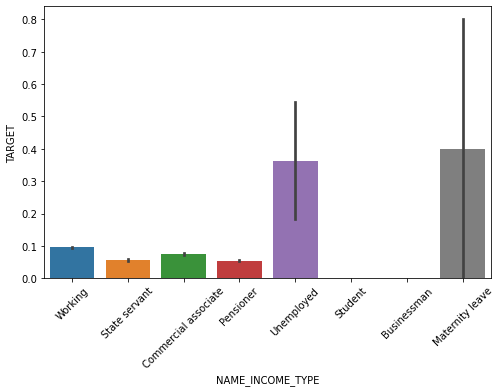

In [261]:
plt.figure(figsize=(8,5))
sns.barplot(x="NAME_INCOME_TYPE", y="TARGET", data=application_data)
plt.xticks(rotation=45, ha="center")
plt.show()

Insight - Those on Maternity Leave and Those who are unemployed are most likely to default

#### 2. Provided Details Vs Target

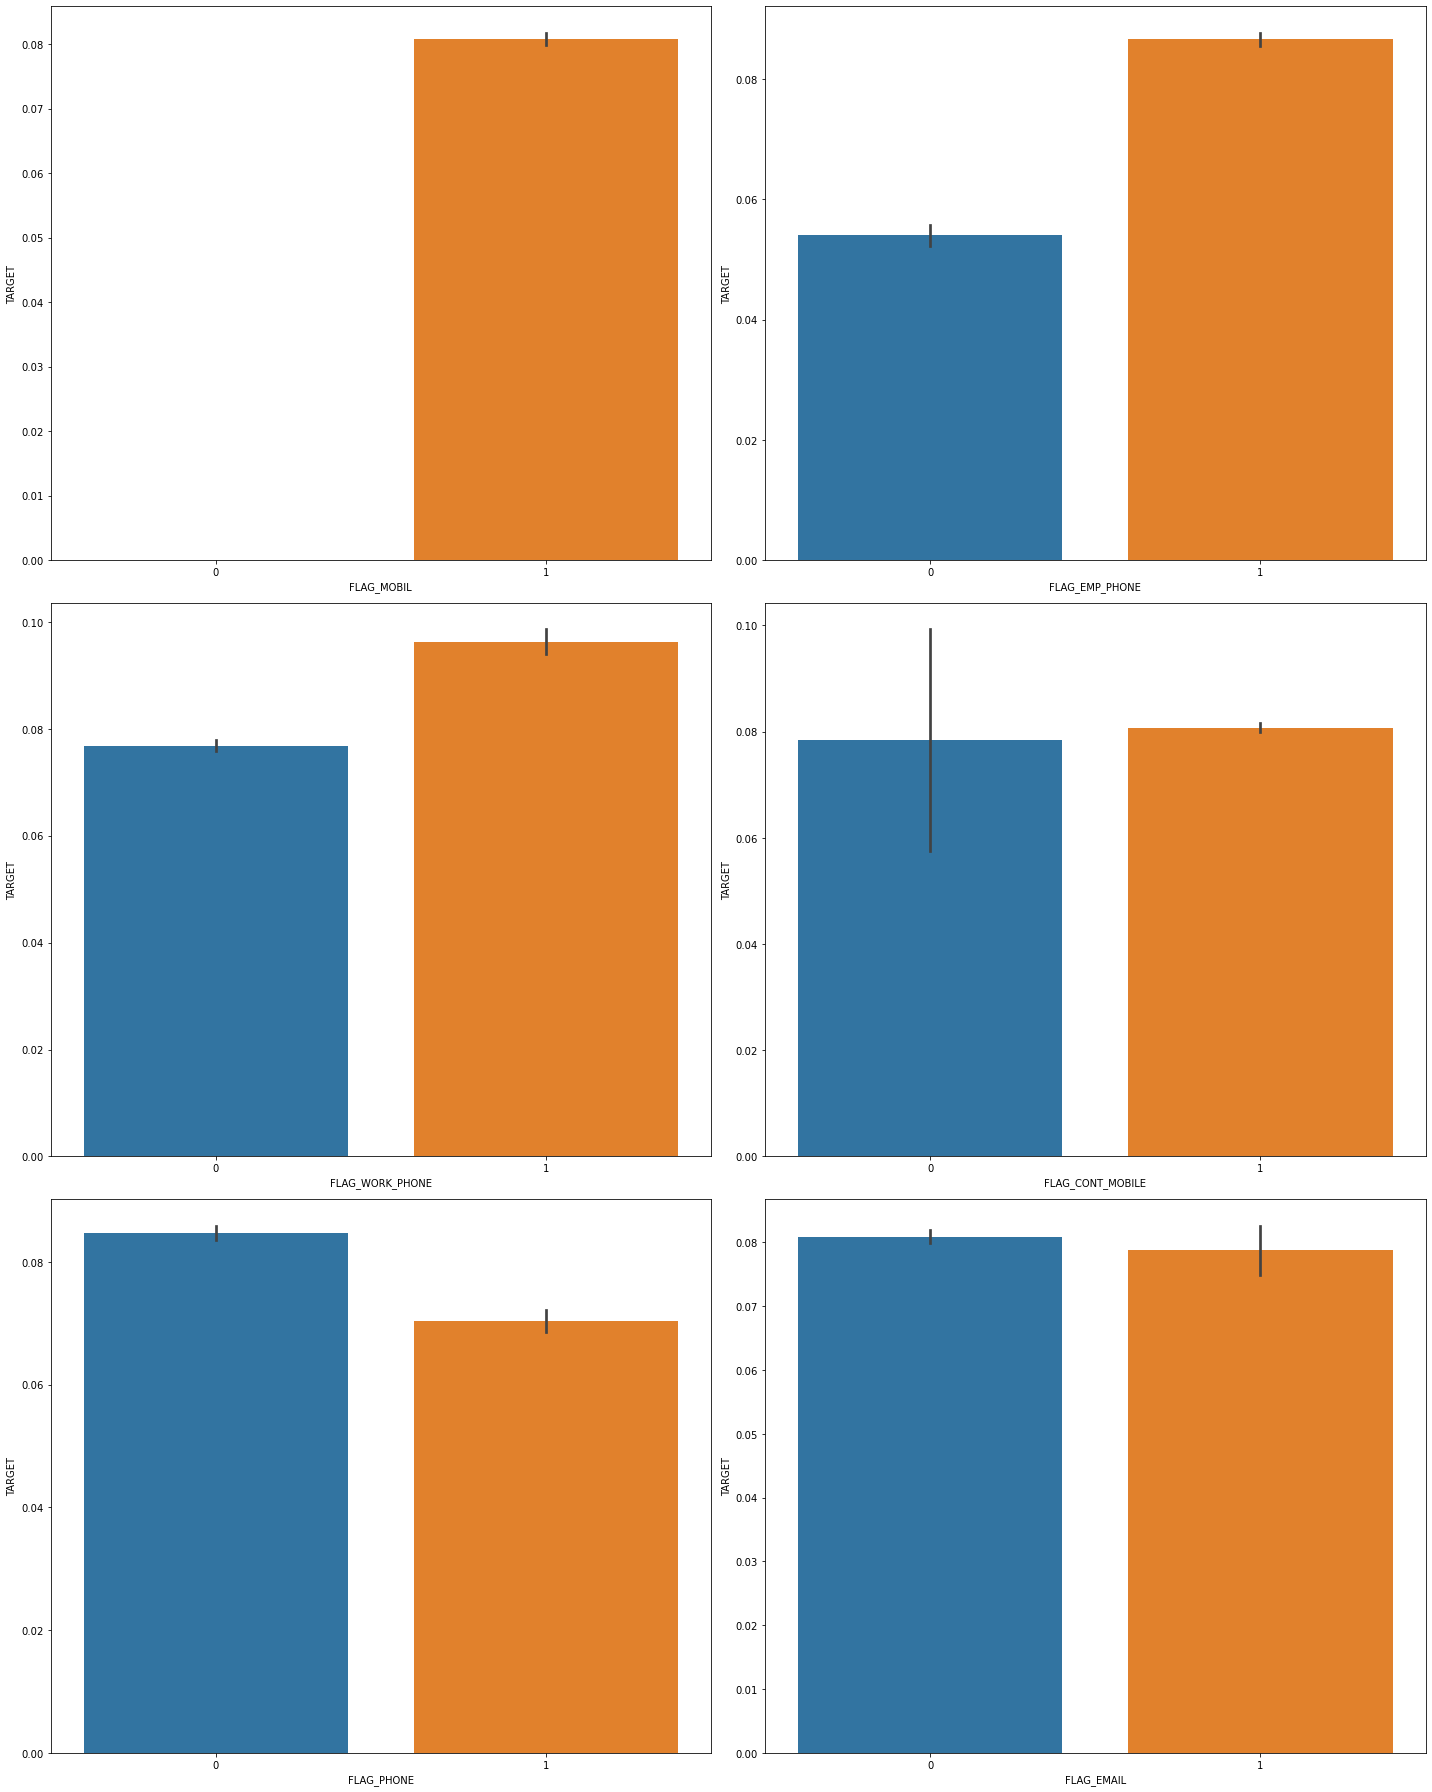

In [262]:
cols = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]   

fig,ax = plt.subplots(3,2, figsize=(20,25))
for i,col in enumerate(cols):
    x,y = divmod(i,2)
    sns.barplot(x=col, y="TARGET", data=application_data, ax=ax[x,y])
    
plt.tight_layout()
plt.show()

Insights-
1. FLAG_MOBILE is 1 for everyone so no analysis can be done.
2. People with FLAG_EMP_PHONE=1 have more default rate.
3. People with FLAG_WORK_PHONE=1 have more default rate.
4. FLAG_CONT_MOBILE does not seem to have any effect on default rate.
5. People with FLAG_PHONE=0 have more default rate.
6. FLAG_EMAIL does not seem to have any effect on default rate.

#### 3. More Details Vs Target

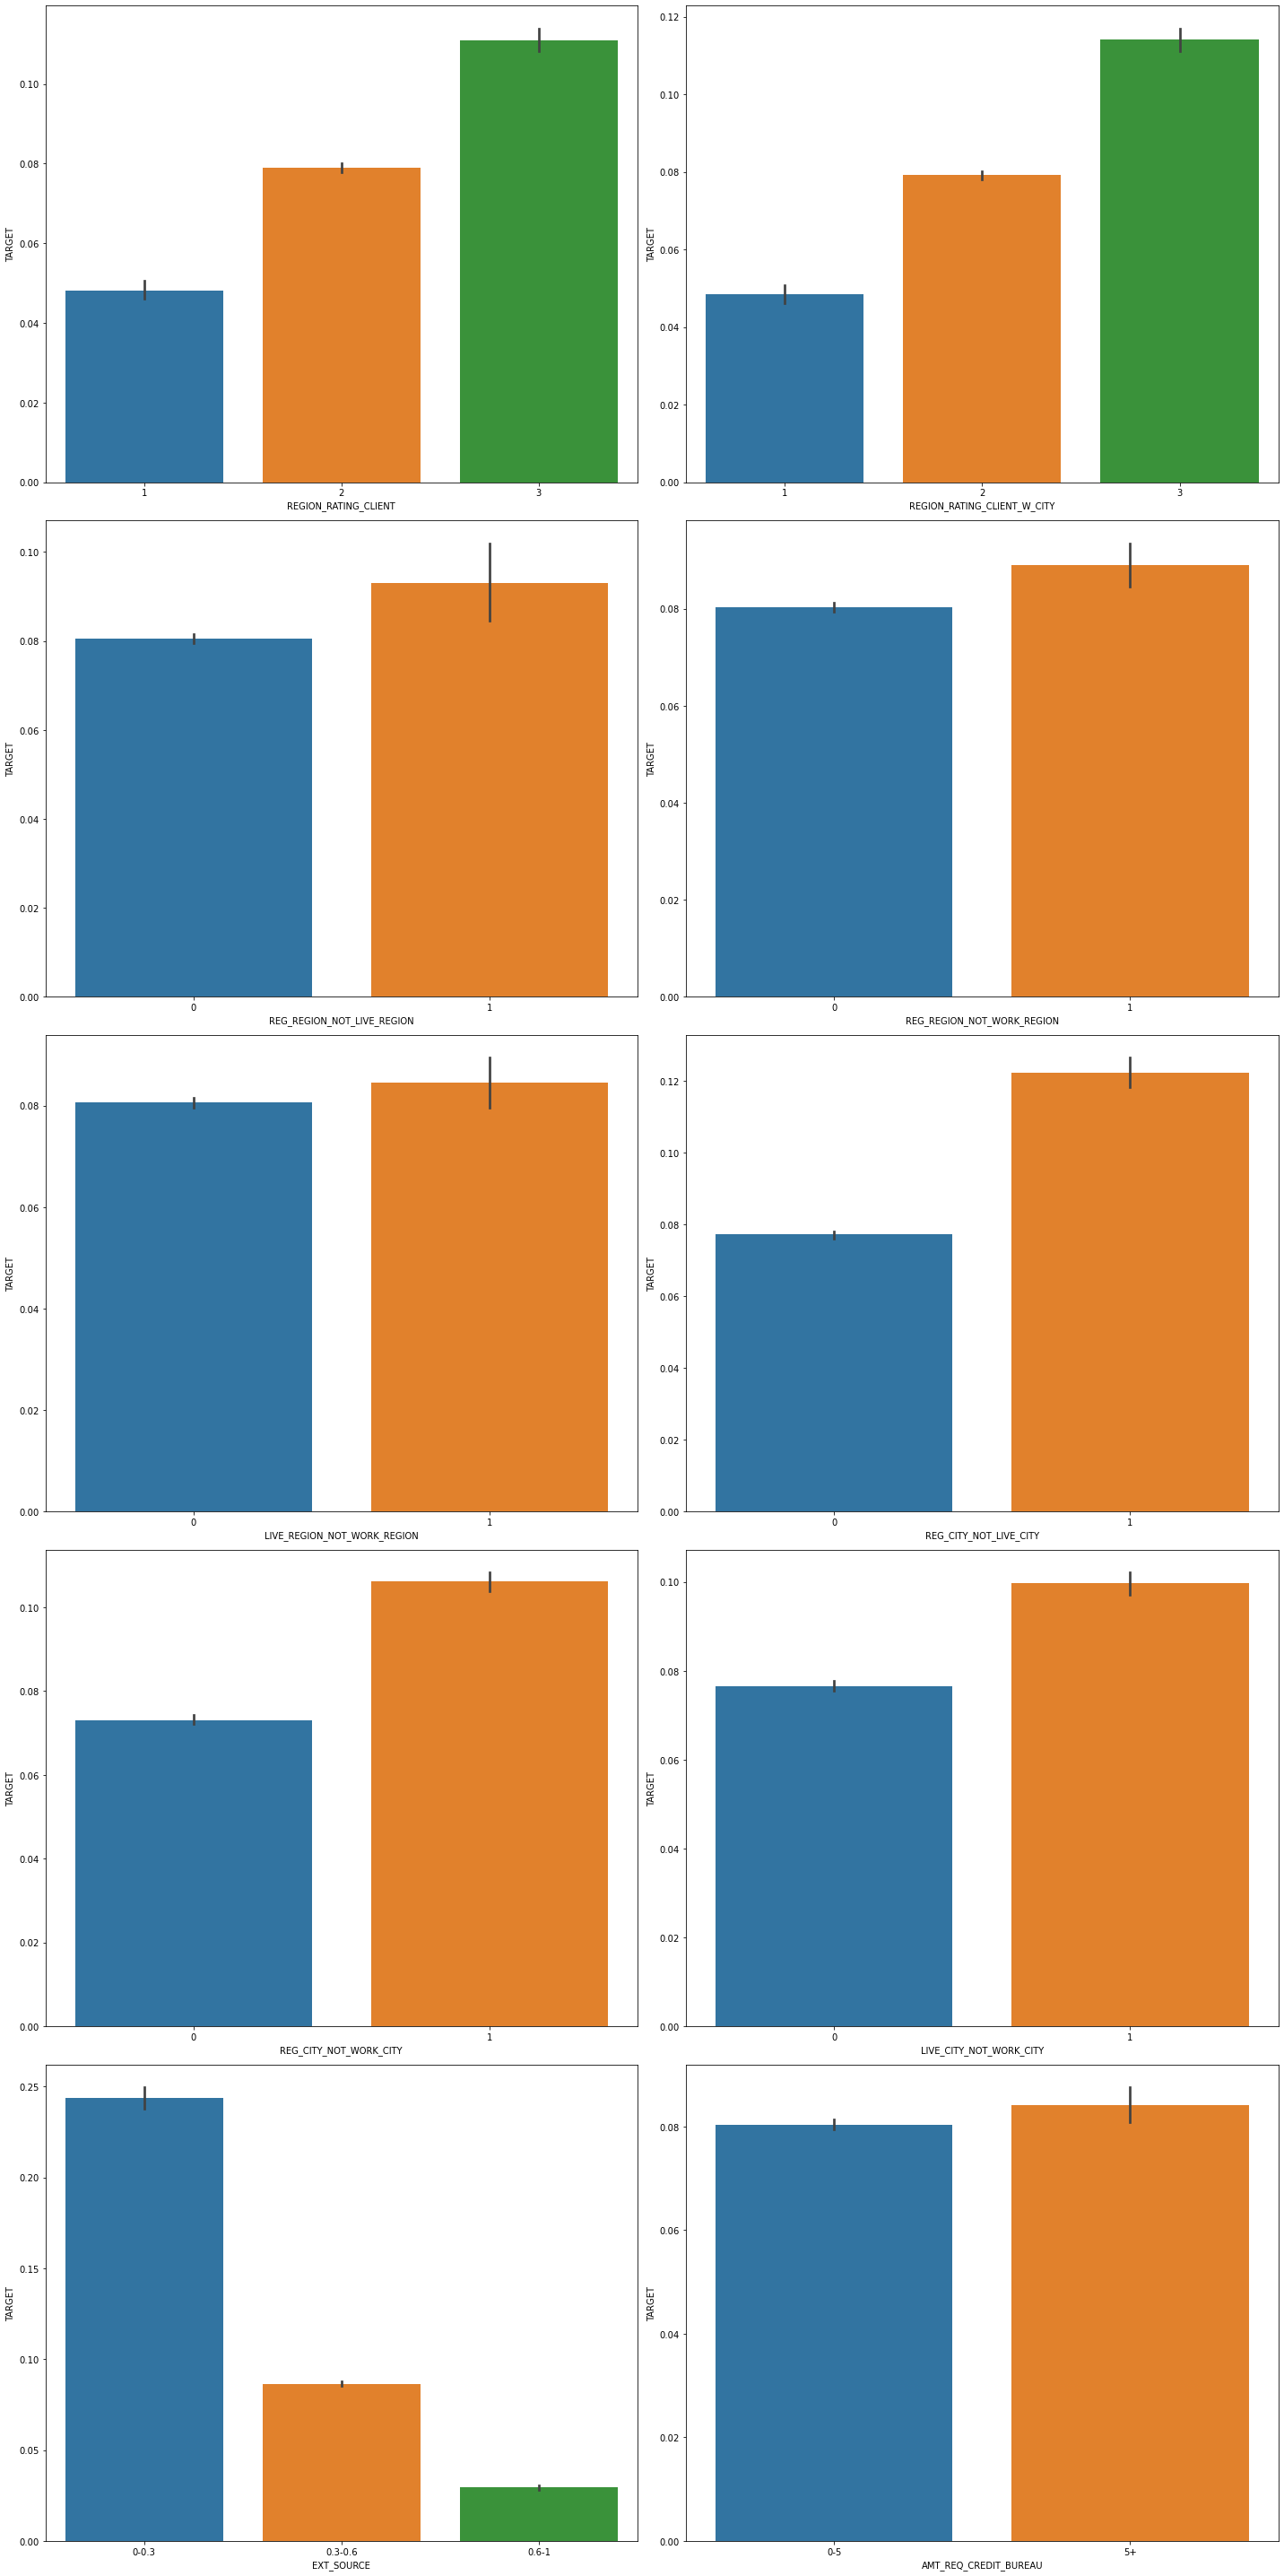

In [263]:
cols = ["REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "REG_REGION_NOT_LIVE_REGION",
        "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
        "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "EXT_SOURCE", "AMT_REQ_CREDIT_BUREAU"]

fig,ax = plt.subplots(5,2, figsize=(20,40))
for i,col in enumerate(cols):
    x,y = divmod(i,2)
    sns.barplot(x=col, y="TARGET", data=application_data, ax=ax[x,y])
    
plt.tight_layout()
plt.show()

Insights-
1. Default Rate increases with increase in REGION_RATING_CLIENT
2. Default Rate increases with increase in REGION_RATING_CLIENT_W_CITY
3. People with Registered Region different from Living Region are somewhat more likely to default.
4. People with Registered Region different from Working Region are somewhat more likely to default.
5. People with Living Region different from Working Region are somewhat more likely to default.
6. People with Registered City different from Living City are more likely to default.
7. People with Registered City different from Working City are more likely to default.
8. People with Living City different from Working City are more likely to default.
9. Default Rate decreases with increase in EXT_SOURCE.
10. AMT_REQ_CREDIT_BUREAU does not seem to have any effect on Default Rate.

#### Provided Details Vs Target

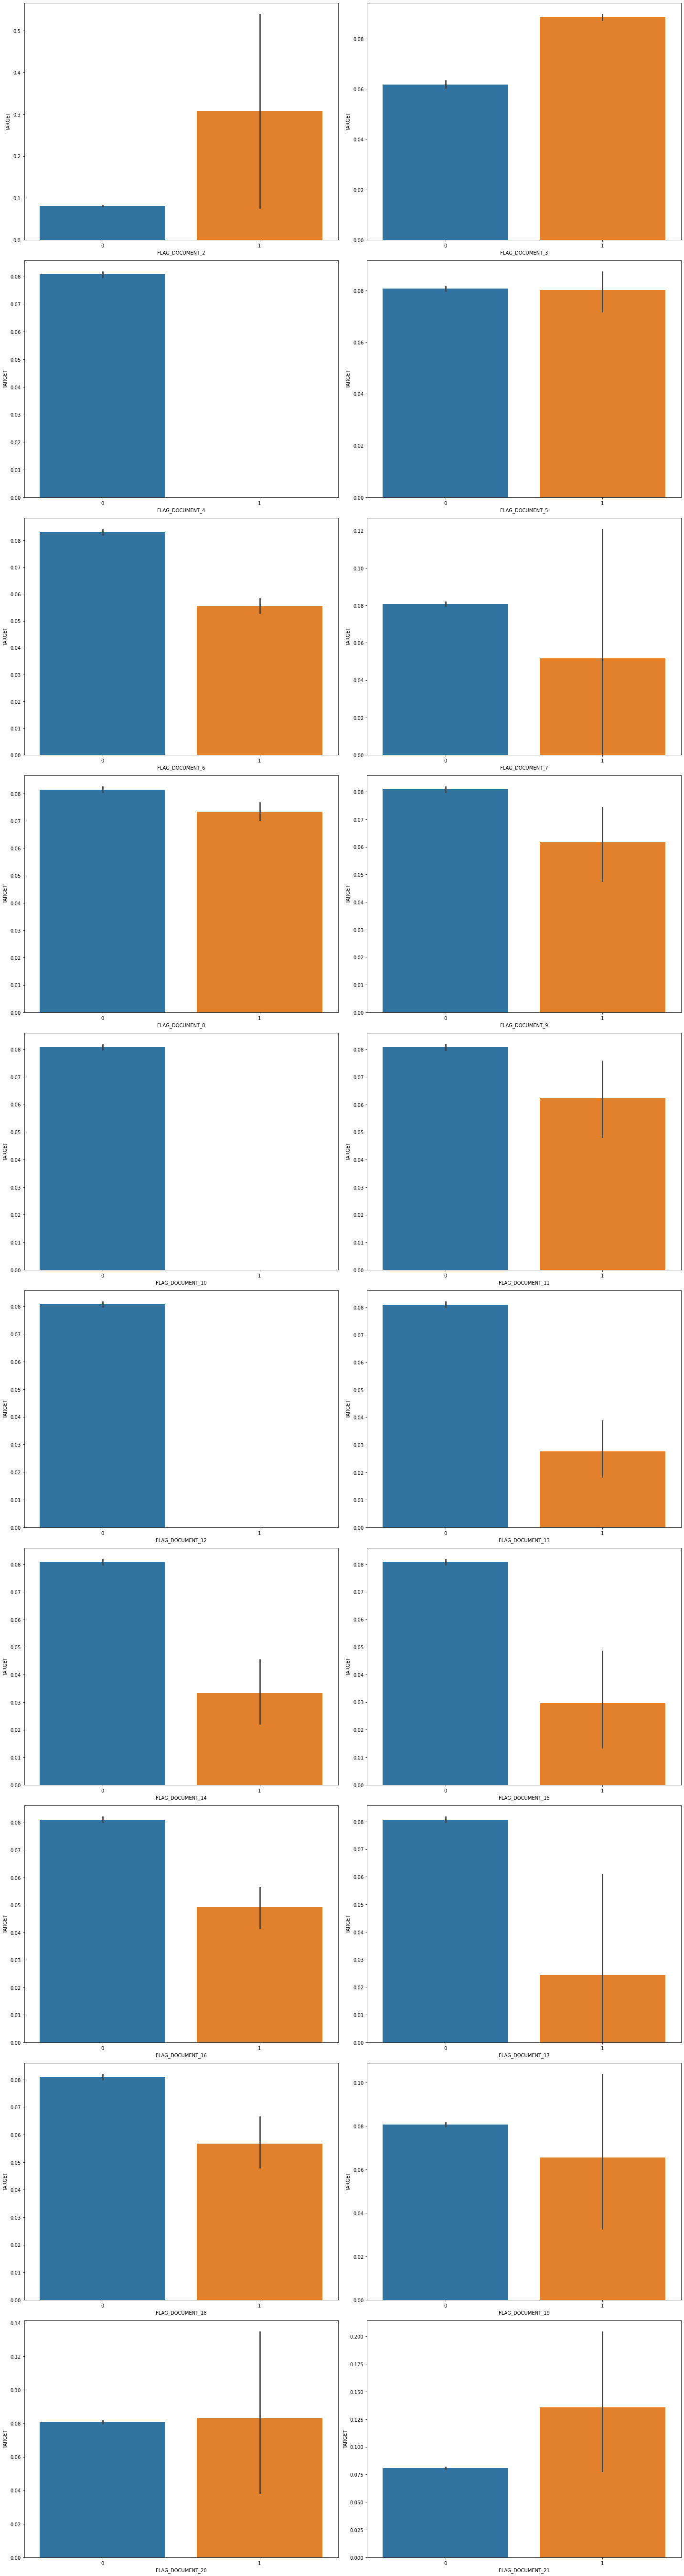

In [264]:
cols = ["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6",
        "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11",
        "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", 
        "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"] 

fig,ax = plt.subplots(10,2, figsize=(20,75))
for i,col in enumerate(cols):
    x,y = divmod(i,2)
    sns.barplot(x=col, y="TARGET", data=application_data, ax=ax[x,y])
    
plt.tight_layout()
plt.show()

Insights-
1. People who have provided document 2 are more likely to default than those who have not provided.
2. People who have provided document 3 are more likely to default than those who have not provided.
3. There are no people who have provided document 4 so no analysis can be done.
4. FLAG_DOCUMENT_5 does not seem to have any effect on default rate.
5. People who have not provided document 6 are more likely to default than those who have not provided.
6. People who have not provided document 7 are more likely to default than those who have not provided.
7. People who have not provided document 8 are more likely to default than those who have not provided.
8. People who have not provided document 9 are more likely to default than those who have not provided.
9. There are no people who have provided document 10 so no analysis can be done.
10. People who have not provided document 11 are more likely to default than those who have not provided.
11. There are no people who have provided document 12 so no analysis can be done.
12. People who have not provided document 13 are more likely to default than those who have not provided.
13. People who have not provided document 14 are more likely to default than those who have not provided.
14. People who have not provided document 15 are more likely to default than those who have not provided.
15. People who have not provided document 16 are more likely to default than those who have not provided.
16. People who have not provided document 17 are more likely to default than those who have not provided.
17. People who have not provided document 18 are more likely to default than those who have not provided.
18. People who have not provided document 19 are more likely to default than those who have not provided.
19. FLAG_DOCUMENT_20 does not seem to have any effect on default rate.
20. People who have not provided document 21 are more likely to default than those who have not provided.

#### 5. Application Details Vs Target

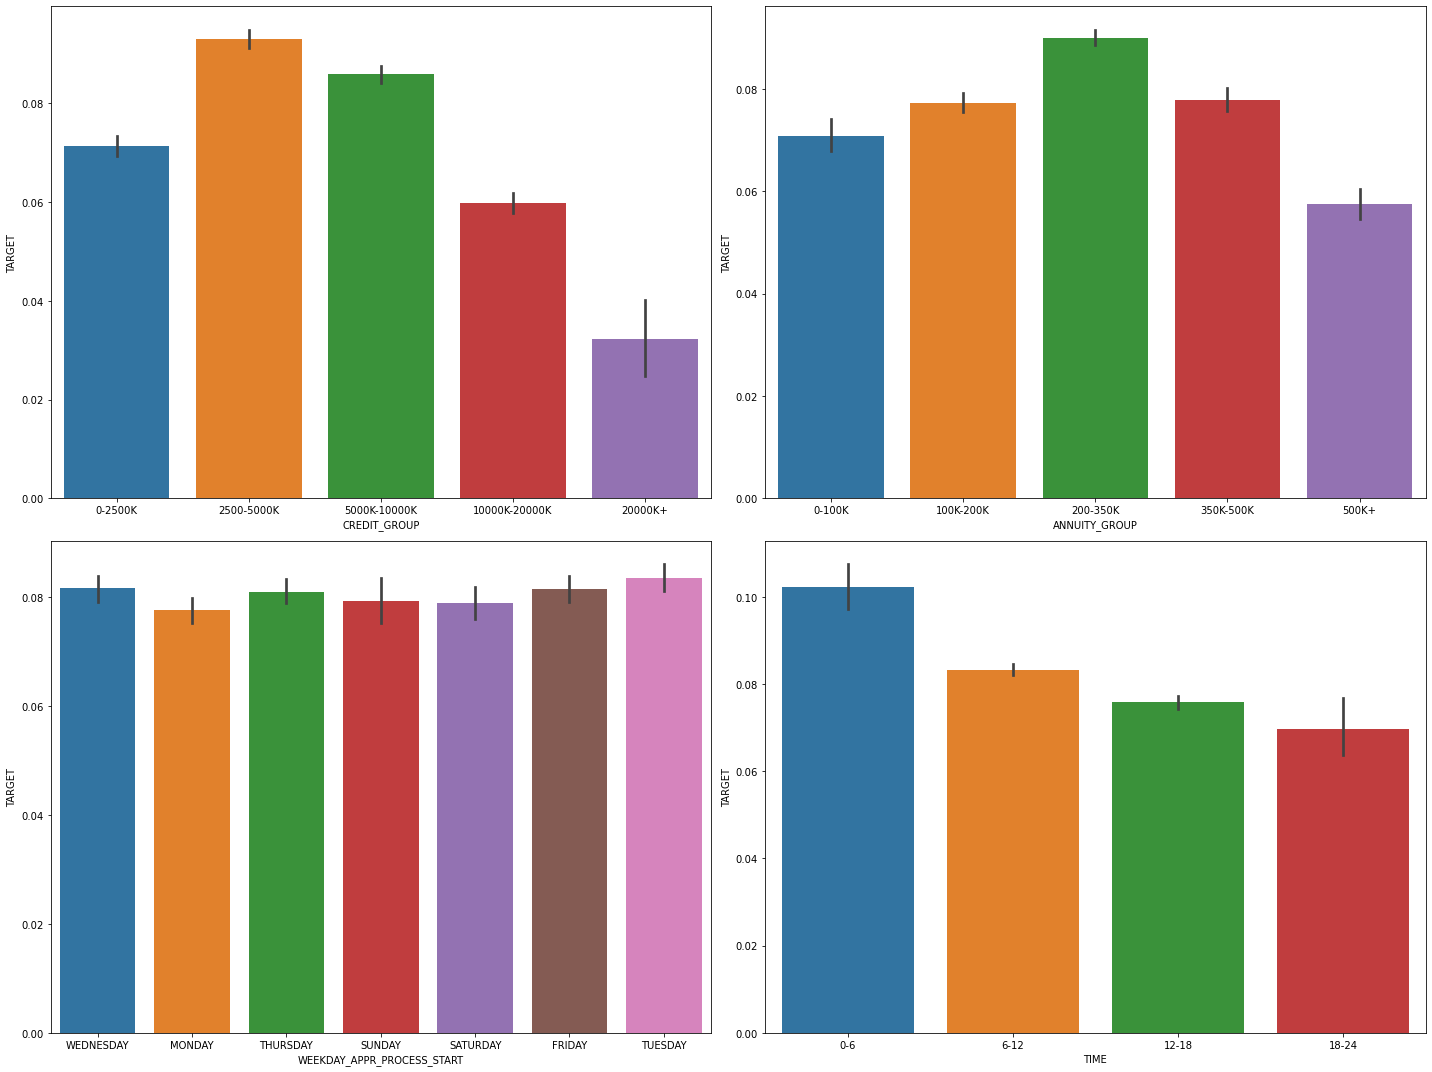

In [265]:
cols = ["CREDIT_GROUP", "ANNUITY_GROUP", "WEEKDAY_APPR_PROCESS_START", "TIME"]

fig,ax = plt.subplots(2,2, figsize=(20,15))
for i,col in enumerate(cols):
    x,y = divmod(i,2)
    sns.barplot(x=col, y="TARGET", data=application_data, ax=ax[x,y])
    
plt.tight_layout()
plt.show()

Insights-
1. People who have credit in the range 2500K-5000K seem to default the most.
2. People who have annuity in the range 200K-350K seem to default the most.
3. WEEKDAY_APPR_PROCESS_START seems to have no effect on default rate.
4. People who apply for loans in the timeframe 0-6 hours default the most. 

### Multivariate Analysis

In [346]:
#Method to display heatmap for multivariate analysis
def show_heatmap(att1, att2, data):
    plt.figure(figsize=(15,10))
    pt = pd.pivot_table(data=data, values = "TARGET", index=att1, columns=att2)
    sns.heatmap(data=pt, cmap="Greens", annot=True, fmt='.2f')
    plt.show()

#### 1. NAME_FAMILY_STATUS VS OCCUPATION_TYPE VS TARGET

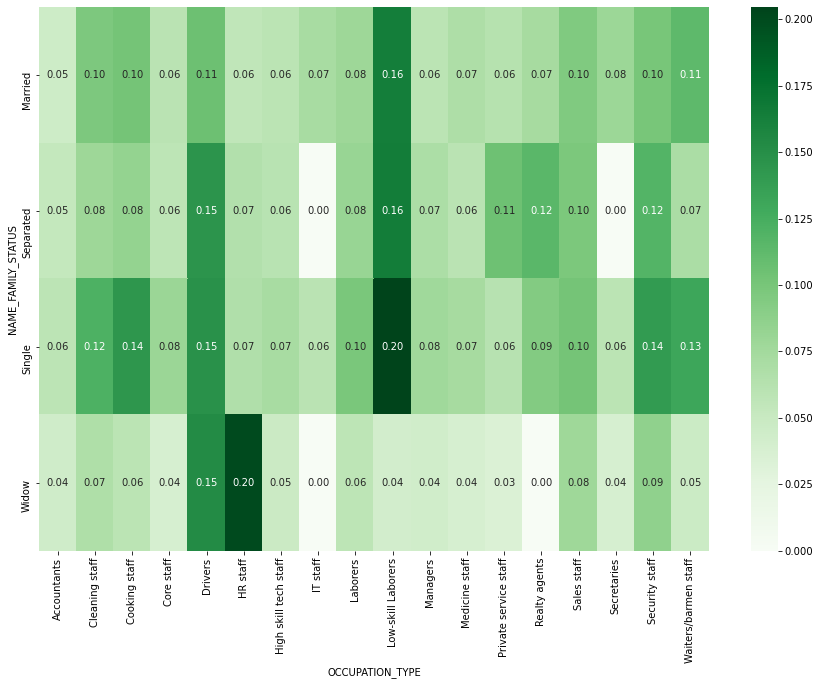

In [347]:
show_heatmap("NAME_FAMILY_STATUS", "OCCUPATION_TYPE", application_data)

Insight - (Single, Low-skill Laborers) and (Widow,HR Staff) are most likey to default.

#### 2. NAME_FAMILY_STATUS VS NAME_EDUCATION_TYPE VS TARGET

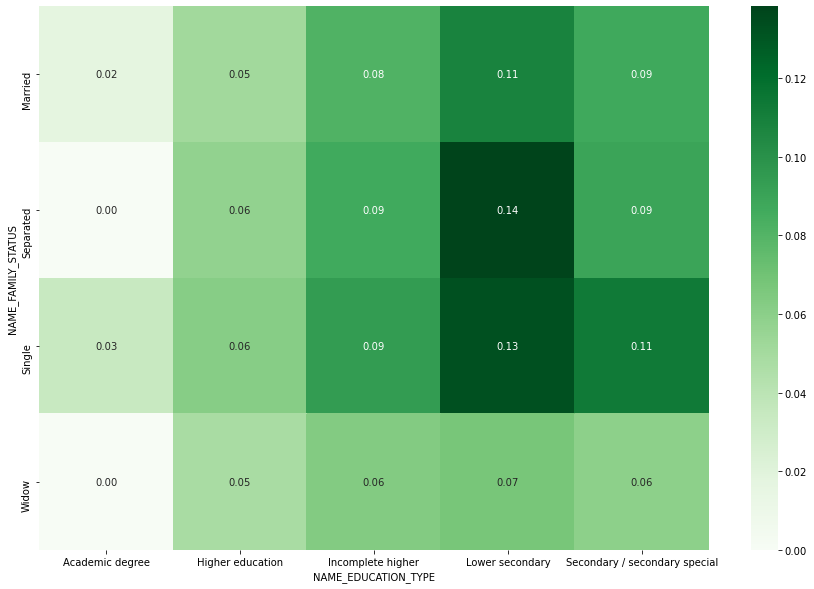

In [348]:
show_heatmap("NAME_FAMILY_STATUS", "NAME_EDUCATION_TYPE", application_data)

Insight - (Single, Lower secondary) and (Seperated, Lower secondary) are the groups which are most likely to default.

#### 3. OCCUPATION_TYPE VS NAME_EDUCATION_TYPE VS TARGET

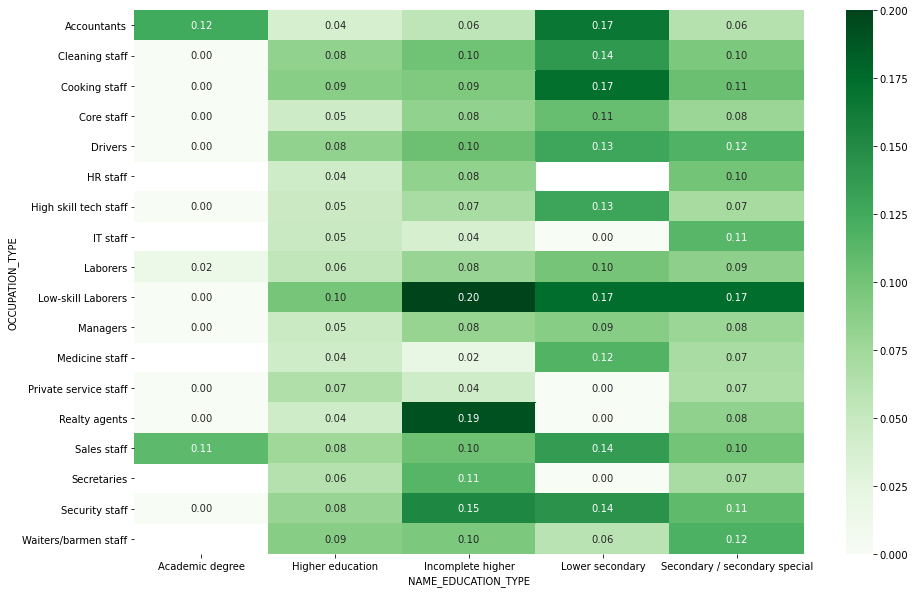

In [349]:
show_heatmap("OCCUPATION_TYPE", "NAME_EDUCATION_TYPE", application_data)

(Incomplete higher, Realty agents) and (Incomplete higher, Low-skill Laborers) are the groups which are most likely to have payment difficulties.

## PREVIOUS APPLICATION DATASET

### Reading The Dataset

In [266]:
prev_data = pd.read_csv("previous_application.csv")

In [267]:
prev_data.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


### Inspecting The Dataset

In [268]:
print("Previous Application Data Dataset")
print("Number of rows: {}".format(prev_data.shape[0]))
print("Number of columns: {}".format(prev_data.shape[1]))

Previous Application Data Dataset
Number of rows: 1670214
Number of columns: 37


In [269]:
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Data Types

In [270]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Missing Values

In [271]:
#Number of Missing Values in each column
prev_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [272]:
#Percentage of Missing Values in each column
prev_data.isnull().sum()/prev_data.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

### Dropping Columns With More Than 40% Missing Values

In [273]:
prev_data.dropna(axis=1, thresh=0.6*prev_data.shape[0], inplace=True)

In [274]:
prev_data.shape

(1670214, 26)

### Missing Value Treatment

1. For continous columns we will use the median of that column to impute the missing values in that column.
2. For categorical columns we will use the mode of that column to impute the missing values in that column.

In [275]:
num_cols = ["AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]

for col in num_cols:
    prev_data[col].fillna(prev_data[col].median(),inplace=True)

In [276]:
cat_cols = ["PRODUCT_COMBINATION"]

for col in cat_cols:
    prev_data[col].fillna(prev_data[col].mode()[0],inplace=True)

#### Let Us Check Again For Missing Values

In [277]:
prev_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

Now we don't have any null value.

### Checking The Numerical Columns For Outlier Values

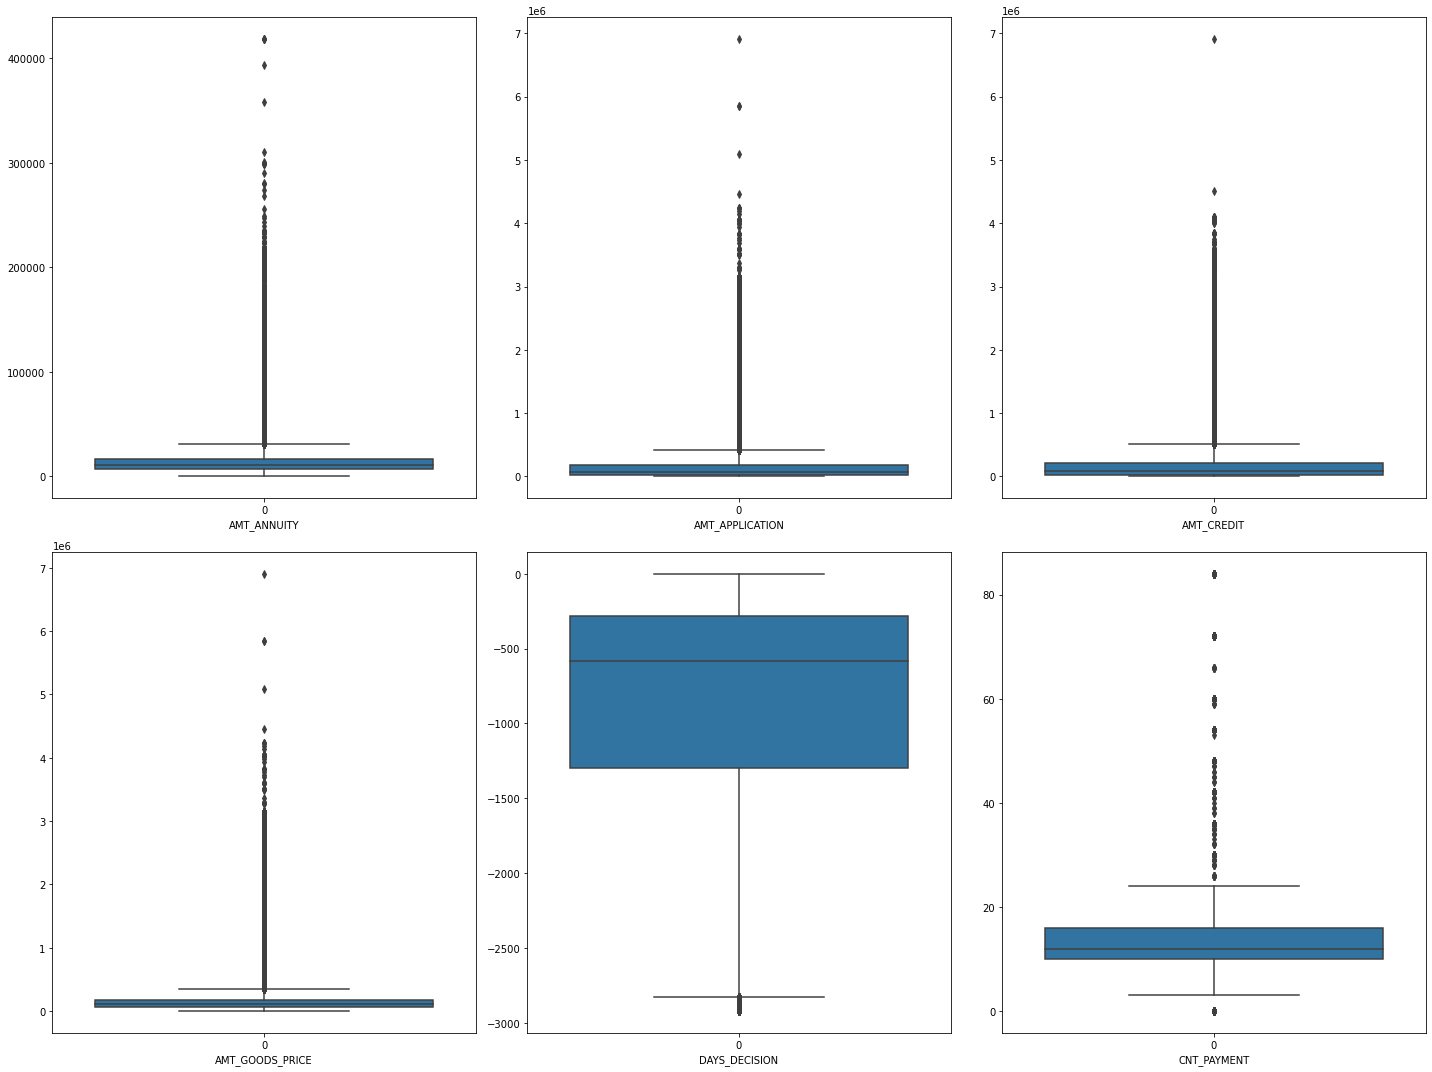

In [278]:
num_cols = ["AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "DAYS_DECISION", "CNT_PAYMENT"]

fig, ax = plt.subplots(2, 3, figsize=(20,15))
for i, col in enumerate(num_cols):
    x,y = divmod(i,3)
    sns.boxplot(data=prev_data[col], ax=ax[x,y])
    ax[x,y].set_xlabel(col)
plt.tight_layout()
plt.show()

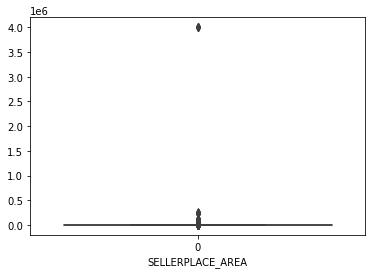

In [279]:
ax = sns.boxplot(data=prev_data["SELLERPLACE_AREA"])
ax.set_xlabel("SELLERPLACE_AREA")
plt.show()

As we can see from the plots there are quite a few outliers in all the numerical variables. But for this analysis we are not removing the outliers.

In [280]:
# The DAYS_DECISION column has negative values so we will convert them to positive values.
prev_data["DAYS_DECISION"] = prev_data["DAYS_DECISION"].apply(lambda x: x*-1)

### Checking The Categorical Columns And Making Changes If Necessary

In [281]:
#Checking the NAME_CONTRACT_TYPE column
prev_data["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [282]:
#Removing the rows with "XNA" in "NAME_CONTRACT_TYPE" column
prev_data = prev_data.loc[~(prev_data["NAME_CONTRACT_TYPE"]=="XNA")]

In [283]:
#Checking the WEEKDAY_APPR_PROCESS_START column
prev_data["WEEKDAY_APPR_PROCESS_START"].value_counts()

TUESDAY      255060
WEDNESDAY    254957
MONDAY       253511
FRIDAY       251986
THURSDAY     249045
SATURDAY     240584
SUNDAY       164725
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [284]:
#Checking the HOUR_APPR_PROCESS_START column
prev_data["HOUR_APPR_PROCESS_START"].value_counts()

11    192690
12    185944
10    181656
13    172213
14    157674
15    142927
9     126970
16    121332
17     95054
8      73071
18     64145
7      45643
19     34082
6      25754
5      15391
20     14528
4       9319
3       5035
21      4081
2       1116
22       720
1        212
23       202
0        109
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [285]:
#Checking the NAME_CASH_LOAN_PURPOSE column
prev_data["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP                                 922315
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [286]:
#Checking the NAME_CONTRACT_STATUS column
prev_data["NAME_CONTRACT_STATUS"].value_counts()

Approved        1036781
Canceled         316004
Refused          290647
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [287]:
#Checking the NAME_PAYMENT_TYPE column
prev_data["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        1033552
XNA                                           627038
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [288]:
#Checking the CODE_REJECT_REASON column
prev_data["CODE_REJECT_REASON"].value_counts()

XAP       1352778
HC         175202
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5242
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [289]:
#Checking the NAME_CLIENT_TYPE column
prev_data["NAME_CLIENT_TYPE"].value_counts()

Repeater     1230960
New           301342
Refreshed     135625
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [290]:
#Removing the rows with "XNA" in "NAME_CLIENT_TYPE" column
prev_data = prev_data.loc[~(prev_data["NAME_CLIENT_TYPE"]=="XNA")]

In [291]:
#Checking the NAME_GOODS_CATEGORY column
prev_data["NAME_GOODS_CATEGORY"].value_counts()

XNA                         949028
Mobile                      224550
Consumer Electronics        121499
Computers                   105693
Audio/Video                  99376
Furniture                    53612
Photo / Cinema Equipment     25011
Construction Materials       24972
Clothing and Accessories     23532
Auto Accessories              7375
Jewelry                       6277
Homewares                     5020
Medical Supplies              3842
Vehicles                      3369
Sport and Leisure             2980
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1548
Direct Sales                   442
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
House Construction               1
Animals                          1
Name: NAME_GOODS_CAT

In [292]:
#Checking the NAME_PORTFOLIO column
prev_data["NAME_PORTFOLIO"].value_counts()

POS      690539
Cash     461238
XNA      370844
Cards    144881
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [293]:
#Checking the NAME_PRODUCT_TYPE column
prev_data["NAME_PRODUCT_TYPE"].value_counts()

XNA        1061808
x-sell      455945
walk-in     150174
Name: NAME_PRODUCT_TYPE, dtype: int64

In [294]:
#Checking the CHANNEL_TYPE column
prev_data["CHANNEL_TYPE"].value_counts()

Credit and cash offices       718760
Country-wide                  494013
Stone                         211967
Regional / Local              108435
Contact center                 71145
AP+ (Cash loan)                57017
Channel of corporate sales      6138
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [295]:
#Checking the NAME_SELLER_INDUSTRY column
prev_data["NAME_SELLER_INDUSTRY"].value_counts()

XNA                     854311
Consumer electronics    398016
Connectivity            275505
Furniture                57813
Construction             29761
Clothing                 23926
Industry                 19194
Auto technology           4984
Jewelry                   2695
MLM partners              1209
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [296]:
#Checking the NAME_YIELD_GROUP column
prev_data["NAME_YIELD_GROUP"].value_counts()

XNA           515725
middle        385220
high          353261
low_normal    321773
low_action     91948
Name: NAME_YIELD_GROUP, dtype: int64

In [297]:
#Checking the PRODUCT_COMBINATION column
prev_data["PRODUCT_COMBINATION"].value_counts()

Cash                              285097
POS household with interest       263486
POS mobile with interest          220519
Cash X-Sell: middle               143777
Cash X-Sell: low                  130108
Card Street                       112436
POS industry with interest         98759
POS household without interest     82840
Card X-Sell                        80512
Cash Street: high                  59639
Cash X-Sell: high                  59276
Cash Street: middle                34657
Cash Street: low                   33781
POS mobile without interest        24045
POS other with interest            23859
POS industry without interest      12587
POS others without interest         2549
Name: PRODUCT_COMBINATION, dtype: int64

### Creating New Columns And Removing Columns Which Are Not Useful

In [298]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

#### Binning AMT_ANNUITY

In [299]:
prev_data["AMT_ANNUITY"].quantile([0,0.25,0.5,0.75,1])

0.00         0.0000
0.25      7540.8750
0.50     11250.0000
0.75     16831.4625
1.00    418058.1450
Name: AMT_ANNUITY, dtype: float64

In [300]:
prev_data["ANNUITY_GROUP"] = pd.cut(prev_data["AMT_ANNUITY"],
    bins=[0,10000,25000,1000000], labels=["0-100K","100-250K","250K+"], include_lowest=True)

In [301]:
prev_data["ANNUITY_GROUP"].value_counts()

100-250K    853001
0-100K      577388
250K+       237538
Name: ANNUITY_GROUP, dtype: int64

#### Binning AMT_APPLICATION

In [302]:
prev_data["AMT_APPLICATION"].quantile([0,0.25,0.5,0.75,1])

0.00          0.00
0.25      18855.00
0.50      71100.00
0.75     180555.75
1.00    6905160.00
Name: AMT_APPLICATION, dtype: float64

In [303]:
prev_data["APPLICATION_GROUP"] = pd.cut(prev_data["AMT_APPLICATION"],
    bins=[0,10000,50000,100000,10000000], labels=["0-100K","100K-500K","500K-1000K","1000K+"], include_lowest=True)

In [304]:
prev_data["APPLICATION_GROUP"].value_counts()

1000K+        681574
0-100K        391336
100K-500K     309746
500K-1000K    285271
Name: APPLICATION_GROUP, dtype: int64

#### Binning AMT_CREDIT

In [305]:
prev_data["AMT_CREDIT"].quantile([0,0.25,0.5,0.75,1])

0.00          0.0
0.25      24250.5
0.50      80626.5
0.75     216441.0
1.00    6905160.0
Name: AMT_CREDIT, dtype: float64

In [306]:
prev_data["CREDIT_GROUP"] = pd.cut(prev_data["AMT_CREDIT"],
    bins=[0,10000,50000,100000,1000000,10000000], labels=["0-100K", "100K-500K", "500K-1000K", "1000K-10000K", "10000K+"], include_lowest=True)

In [307]:
prev_data["CREDIT_GROUP"].value_counts()

1000K-10000K    669438
0-100K          335746
100K-500K       318639
500K-1000K      280679
10000K+          63425
Name: CREDIT_GROUP, dtype: int64

#### Binning HOUR_APPR_PROCESS_START

In [308]:
prev_data["TIME"] = pd.cut(prev_data["HOUR_APPR_PROCESS_START"],
    bins=[0,6,12,18,24], labels=["0-6","6-12","12-18","18-24"], include_lowest=True)

In [309]:
prev_data["TIME"].value_counts()

6-12     805055
12-18    752452
0-6       56858
18-24     53562
Name: TIME, dtype: int64

#### Binning DAYS_DECISION

In [310]:
prev_data["DAYS_DECISION"].quantile([0,0.25,0.5,0.75,1])

0.00       1.0
0.25     281.0
0.50     583.0
0.75    1302.0
1.00    2922.0
Name: DAYS_DECISION, dtype: float64

In [311]:
prev_data["DAYS_DECISION"] = pd.cut(prev_data["DAYS_DECISION"],
    bins=[0,180,365,3000], labels=["Within 6 Months","Within 1 Year","1 Year +"], include_lowest=True)

In [312]:
prev_data["DAYS_DECISION"].value_counts()

1 Year +           1096258
Within 1 Year       356013
Within 6 Months     215656
Name: DAYS_DECISION, dtype: int64

#### Binning CNT_PAYMENT

In [313]:
prev_data["CNT_PAYMENT"].quantile([0,0.25,0.5,0.75,1])

0.00     0.0
0.25    10.0
0.50    12.0
0.75    16.0
1.00    84.0
Name: CNT_PAYMENT, dtype: float64

In [314]:
prev_data["CNT_PAYMENT"] = pd.cut(prev_data["CNT_PAYMENT"],
    bins=[0,10,20,100], labels=["0-10","10-20","20+"], include_lowest=True)

In [315]:
prev_data["CNT_PAYMENT"].value_counts()

10-20    788511
0-10     541978
20+      337438
Name: CNT_PAYMENT, dtype: int64

#### Removing Redundant Columns

In [316]:
cols = ["AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "HOUR_APPR_PROCESS_START"]
prev_data.drop(cols, axis=1, inplace=True)

#### Removing these columns as they have too many categories

In [317]:
cols = ["PRODUCT_COMBINATION", "NAME_GOODS_CATEGORY", "NAME_CASH_LOAN_PURPOSE"]
prev_data.drop(cols, axis=1, inplace=True)

#### Removing columns which are not useful

In [318]:
prev_data.drop(["AMT_GOODS_PRICE", "SELLERPLACE_AREA"], axis=1, inplace=True)

#### Checking The Columns after all the operations

In [319]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667927 entries, 0 to 1670213
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1667927 non-null  int64   
 1   SK_ID_CURR                   1667927 non-null  int64   
 2   NAME_CONTRACT_TYPE           1667927 non-null  object  
 3   WEEKDAY_APPR_PROCESS_START   1667927 non-null  object  
 4   FLAG_LAST_APPL_PER_CONTRACT  1667927 non-null  object  
 5   NFLAG_LAST_APPL_IN_DAY       1667927 non-null  int64   
 6   NAME_CONTRACT_STATUS         1667927 non-null  object  
 7   DAYS_DECISION                1667927 non-null  category
 8   NAME_PAYMENT_TYPE            1667927 non-null  object  
 9   CODE_REJECT_REASON           1667927 non-null  object  
 10  NAME_CLIENT_TYPE             1667927 non-null  object  
 11  NAME_PORTFOLIO               1667927 non-null  object  
 12  NAME_PRODUCT_TYPE           

Now we are ready to merge the CURRENT APPLICATION DATASET WITH PREVIOUS APPLICATION DATASET

## Merging The Two Datasets

In [320]:
applications = application_data[["SK_ID_CURR","TARGET"]].merge(right=prev_data, how="inner", on="SK_ID_CURR")

### Inspecting the Final Dataset

In [321]:
applications.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,ANNUITY_GROUP,APPLICATION_GROUP,CREDIT_GROUP,TIME
0,100002,1,1038818,Consumer loans,SATURDAY,Y,1,Approved,1 Year +,XNA,XAP,New,POS,XNA,Stone,Auto technology,20+,low_normal,0-100K,1000K+,1000K-10000K,6-12
1,100003,0,1810518,Cash loans,FRIDAY,Y,1,Approved,1 Year +,XNA,XAP,Repeater,Cash,x-sell,Credit and cash offices,XNA,10-20,low_normal,250K+,1000K+,10000K+,6-12
2,100003,0,2636178,Consumer loans,SUNDAY,Y,1,Approved,1 Year +,Cash through the bank,XAP,Refreshed,POS,XNA,Stone,Furniture,0-10,middle,250K+,1000K+,1000K-10000K,12-18
3,100003,0,2396755,Consumer loans,SATURDAY,Y,1,Approved,1 Year +,Cash through the bank,XAP,Refreshed,POS,XNA,Country-wide,Consumer electronics,10-20,middle,0-100K,500K-1000K,500K-1000K,12-18
4,100004,0,1564014,Consumer loans,FRIDAY,Y,1,Approved,1 Year +,Cash through the bank,XAP,New,POS,XNA,Regional / Local,Connectivity,0-10,middle,0-100K,100K-500K,100K-500K,0-6


In [322]:
print("Number of rows: {}".format(applications.shape[0]))
print("Number of columns: {}".format(applications.shape[1]))

Number of rows: 1411845
Number of columns: 22


In [323]:
applications.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'ANNUITY_GROUP', 'APPLICATION_GROUP', 'CREDIT_GROUP', 'TIME'],
      dtype='object')

### Bivariate Analysis

#### Loan Details Vs Target

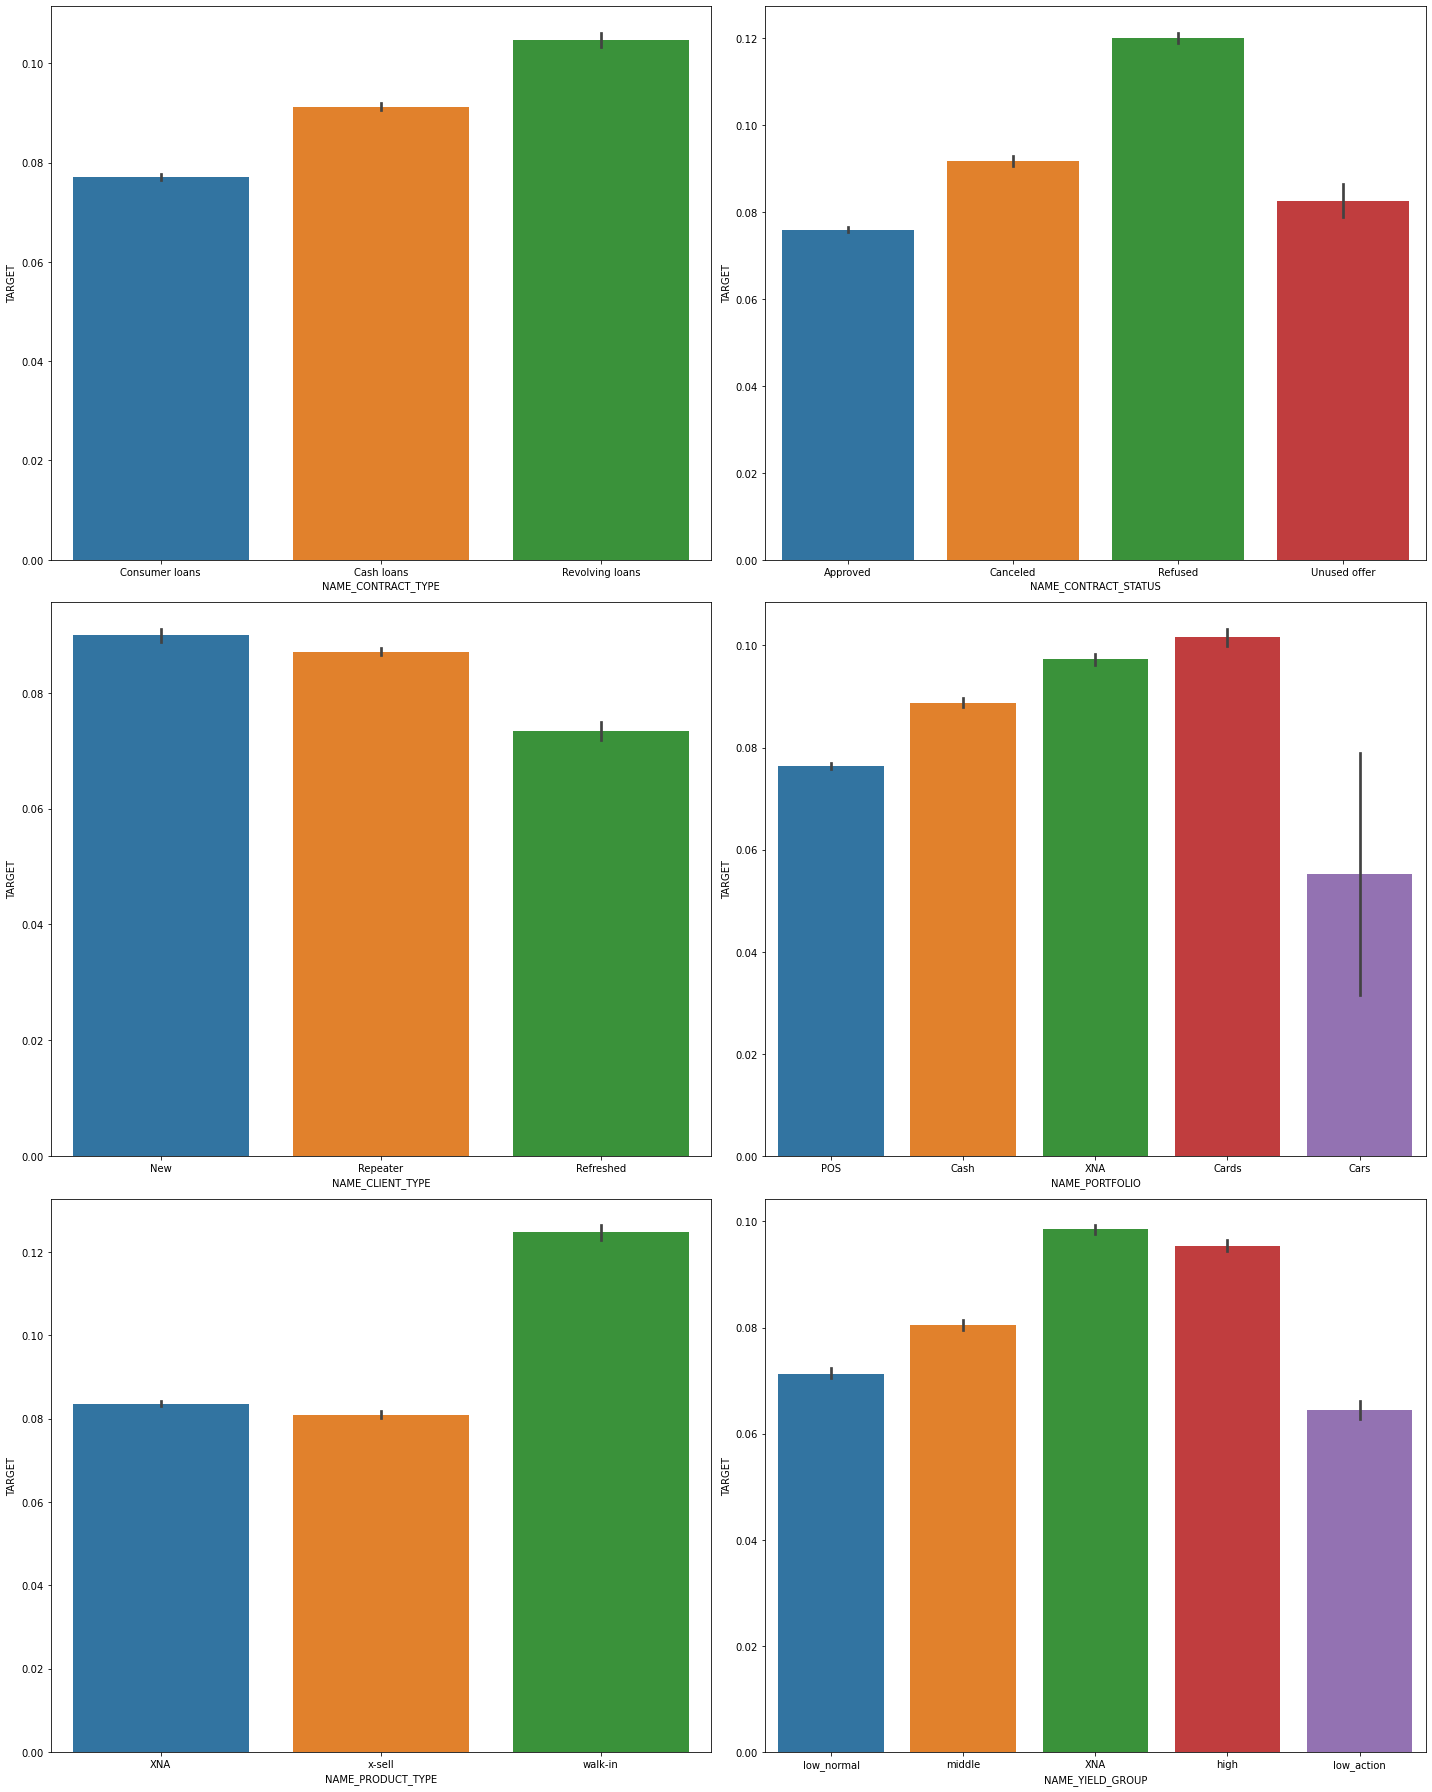

In [324]:
cols = ["NAME_CONTRACT_TYPE", "NAME_CONTRACT_STATUS", "NAME_CLIENT_TYPE", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", 
        "NAME_YIELD_GROUP"]

fig,ax = plt.subplots(3,2, figsize=(20,25))
for i,col in enumerate(cols):
    x,y = divmod(i,2)
    sns.barplot(x=col, y="TARGET", data=applications, ax=ax[x,y])
    
plt.tight_layout()
plt.show()

Insights-
1. People who have applied for Revolving Loans have the highest default rate.
2. People whose previous application got refused have the highest default rate.
3. People who were new when applying for the Previous Application have the highest default rate.
4. People whose Previous Application was for Cards have the highest default rate.
5. People who had the product walk in in the Previous Application have the highest default rate.
6. People with NAME_YIELD_GROUP="XNA" have the highest default rate.

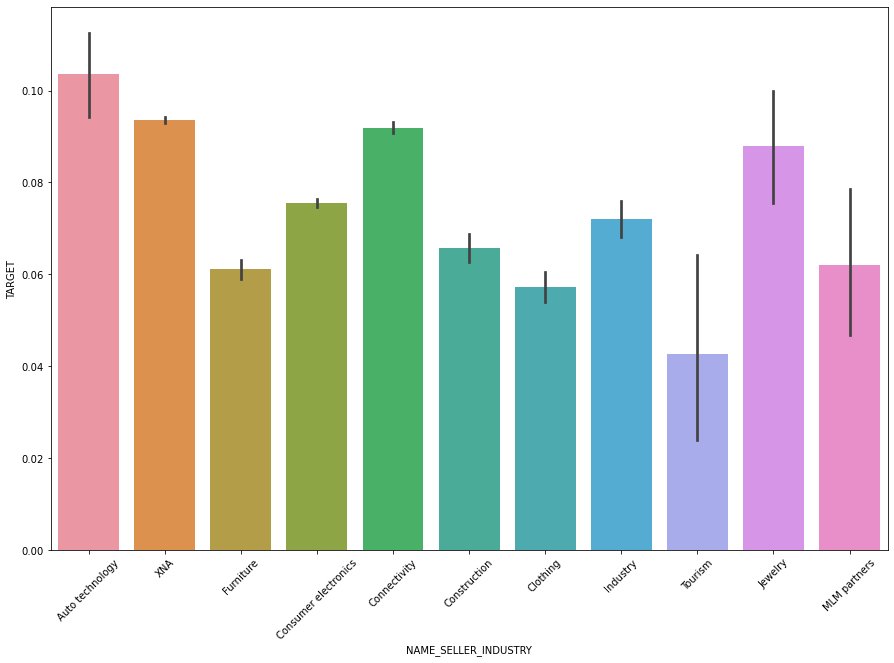

In [325]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="NAME_SELLER_INDUSTRY", y="TARGET", data=applications)
plt.xticks(rotation=45, ha="center")
plt.show()

Insight- The Previous Application having sellers of the Industries - Auto Technology, XNA, Connectivity and Jewelry have the highest default rates.

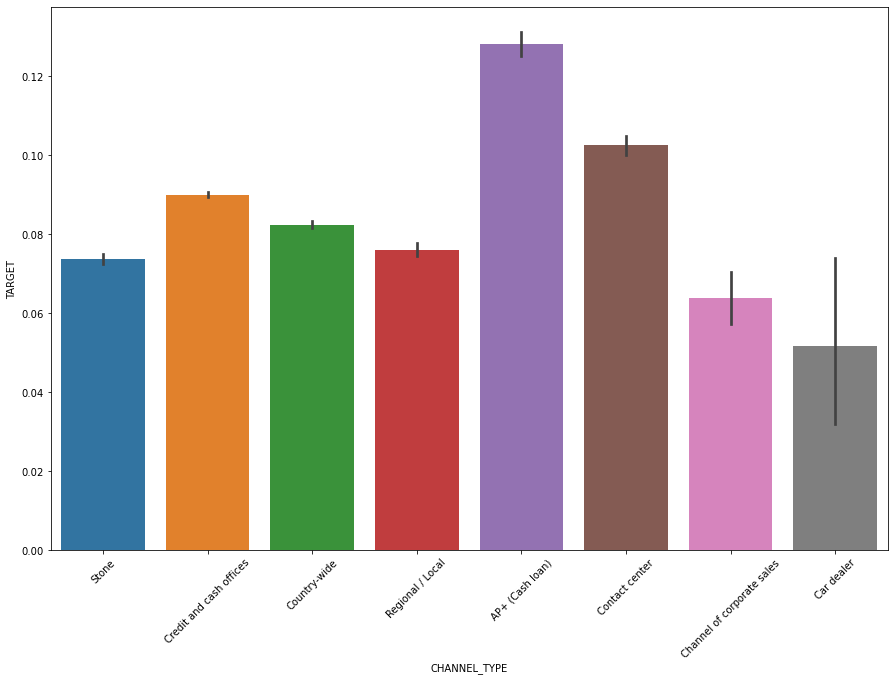

In [326]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="CHANNEL_TYPE", y="TARGET", data=applications)
plt.xticks(rotation=45, ha="center")
plt.show()

Insight- Customers acquired through the Channel AP+ have the maximum default rate.

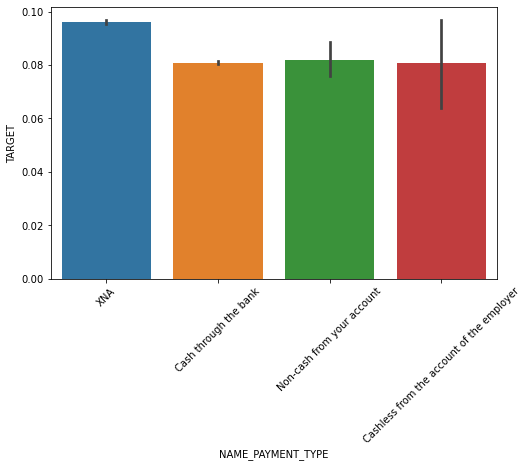

In [327]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x="NAME_PAYMENT_TYPE", y="TARGET", data=applications)
plt.xticks(rotation=45, ha="center")
plt.show()

Insight- NAME_PAYMENT_TYPE does not seem to have any effect on the default rates.

#### Loan Application Details Vs Target

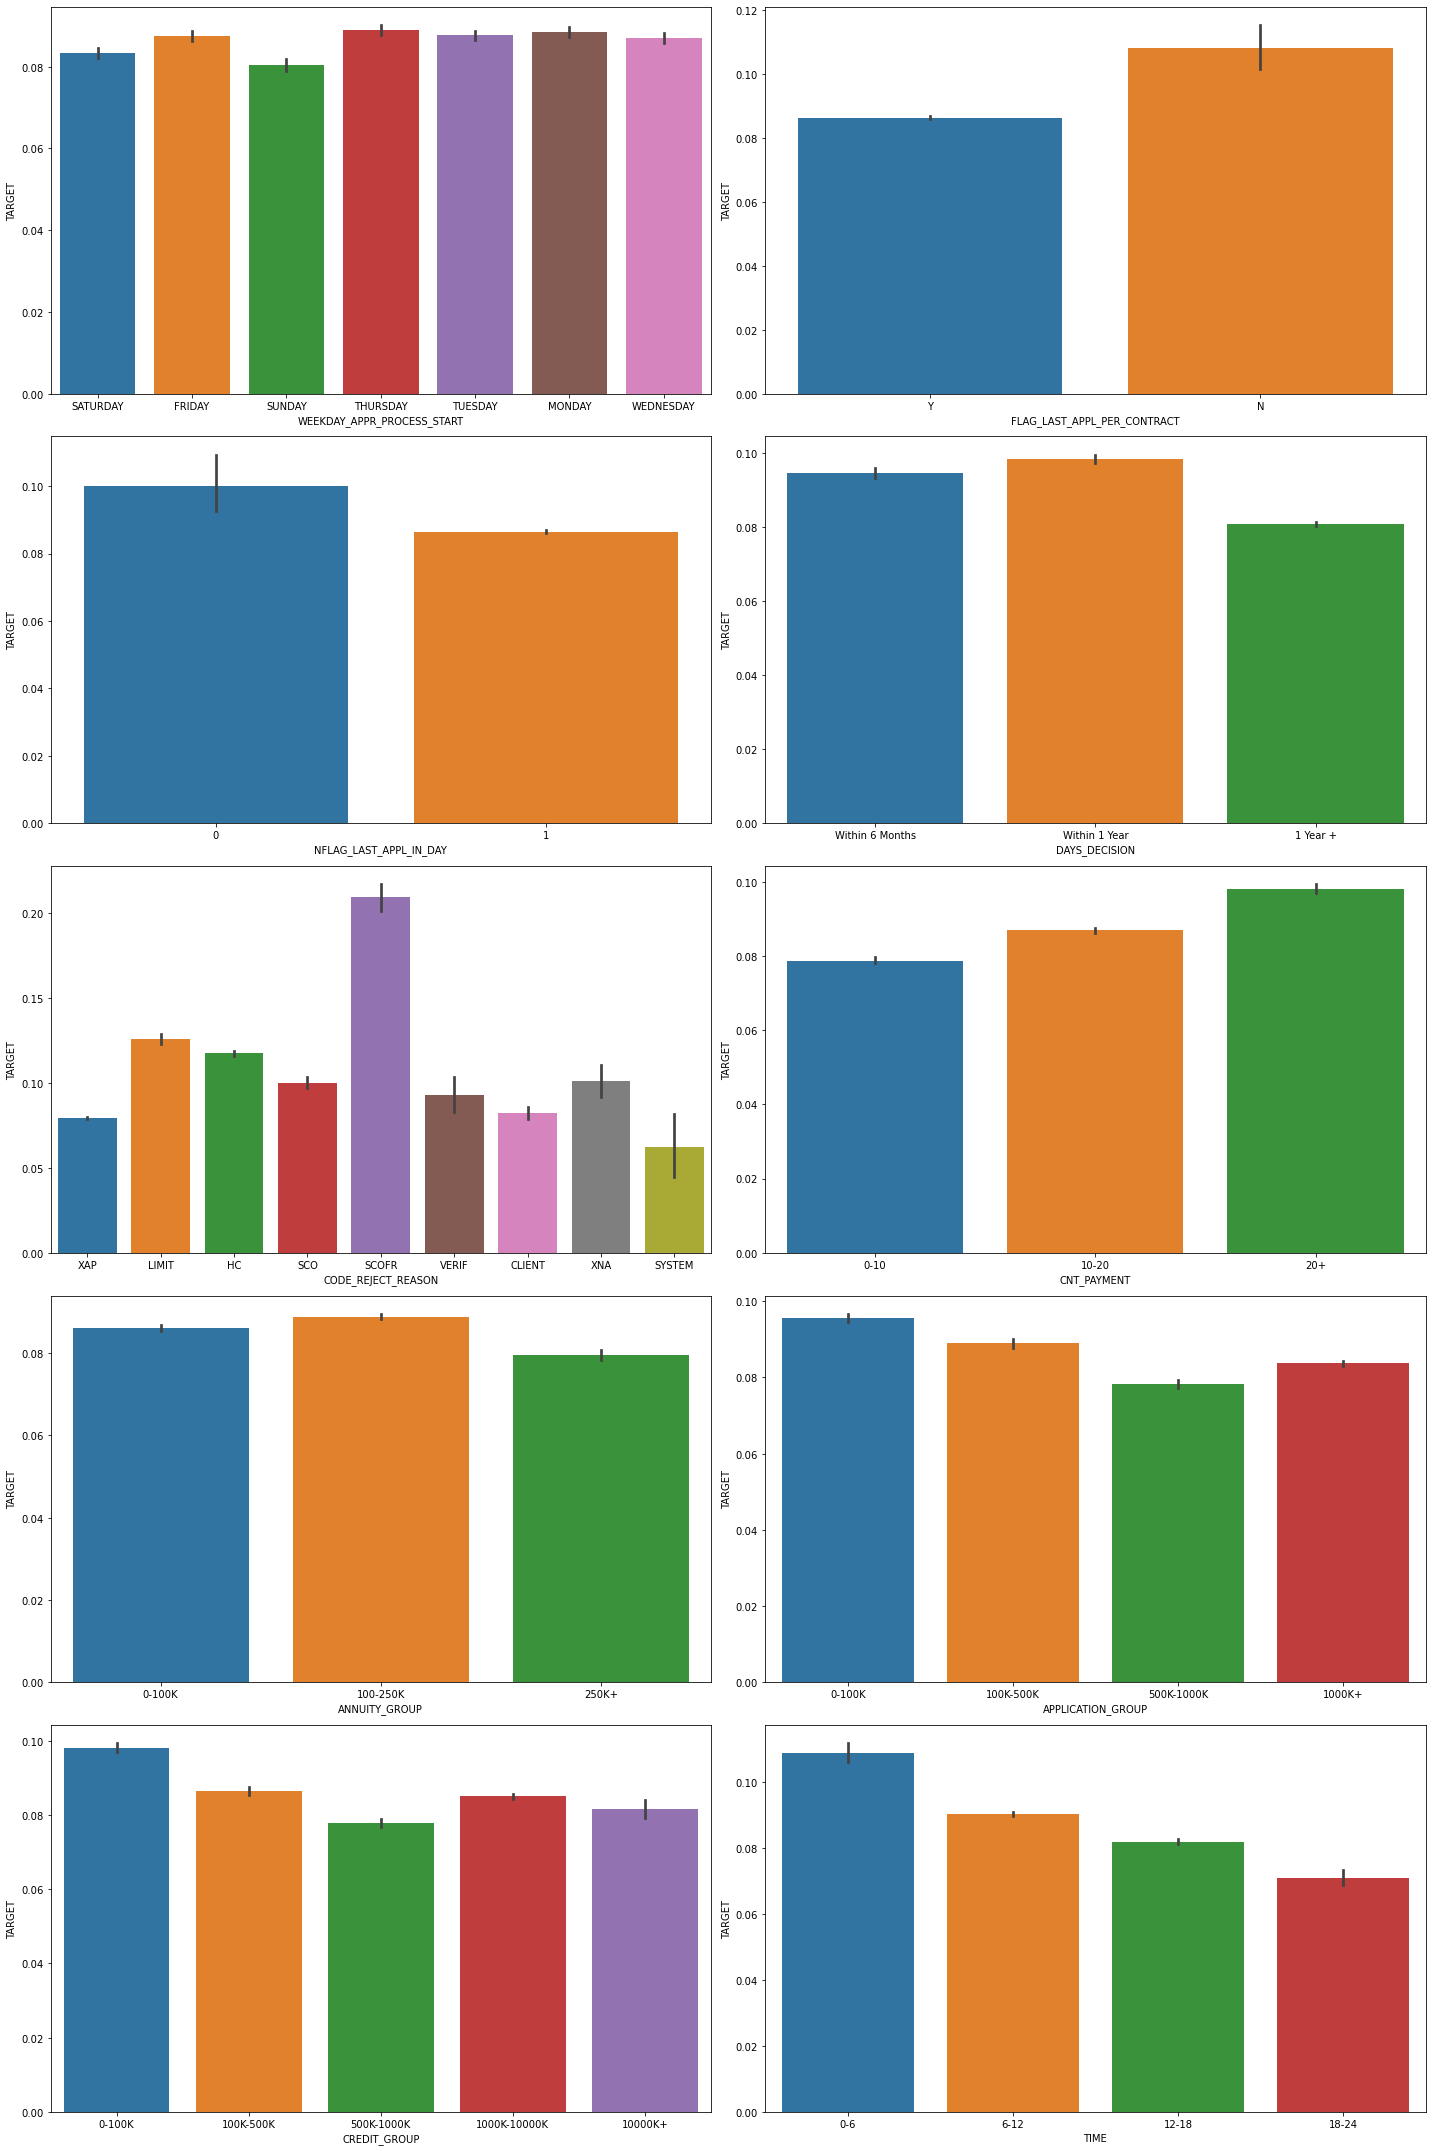

In [328]:
cols = ["WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY", "DAYS_DECISION",
       "CODE_REJECT_REASON", "CNT_PAYMENT", "ANNUITY_GROUP", "APPLICATION_GROUP", "CREDIT_GROUP", 
       "TIME"]

fig,ax = plt.subplots(5,2, figsize=(20,30))
for i,col in enumerate(cols):
    x,y = divmod(i,2)
    sns.barplot(x=col, y="TARGET", data=applications, ax=ax[x,y])
    
plt.tight_layout()
plt.show()

Insights-
1. WEEKDAY_APPR_PROCESS_START does not seem to have any effect on default rates.
2. Applications which are the last for previous contract have the highest default rate.
3. NFLAG_LAST_APPL_IN_DAY does not seem to have any effect on the default rate.
4. Applications with decisions taken within 1 Year of the current application have the highest default rate.
5. Previous applications which were rejected with SCOFR code have the highest default rate.
6. Previous applications with 20+ terms of previous credit have the highest default rate.
7. ANNUITY_GROUP does not seem to have any effect on default rates.
8. People having previous applications in the range of 0-100K have the highest default rate.
9. People having credit of previous applications in the range of 0-100K have the highest default rate.
10. Previous applications which were applied in the timeframe 0-6 hours have the highest default rate.

## CONCLUSION

Based on the above analysis the following steps should be taken by the bank to avoid bad debts : - 

1. Bank should focus on people who live in rented apartments and who live with their parents as there is a high rate of default in these groups.

2. Bank should focus on people with lower secondary education because they are most likely to default among all other education types.

3. Single and seperated people need to be analyzed closely as they have a high rate of default compared to other family status types.

4. Bank should give big loans to higher age people as the rate of default decreases with increase in age.

5. Bank should not give big loan to people with 1-3 years of experience as they have a high rate of default.

6. Bank should be wary of giving loans to people who have changed their phone number in the last one month.

7. Bank should avoid giving loans to Low skill Laborers as the rate of default is quite high in this class. 

8. Bank should analyze people who are working in Industry type 8 & 13, and those who are working in Transport type 3.

9. Bank should avoid giving loans to Unemployed people and those on Maternity Leave as the rate of default is very high for these groups.

10. Bank should insist on getting Documents 6,7,8,9,11,13,14,15,16,17,18,19,21.